# Predicting Success on Kickstarter
Kickstarter is a crowdfunding platform used by thousands of small and independent creators to fund their projects, businesses, and a variety of one-off productions. As most projects on Kickstarter are unsuccessful, and 

In [221]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [222]:
df = pd.read_csv(r"C:\Users\Jack\Documents\git-projects\ibm_coursera_capstone_project\Kickstarter2020\kickstarter_projects.csv")
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,1,This is a project I created to find out why 10...,"{""id"":360,""name"":""Video"",""slug"":""journalism/vi...",20,US,the United States,1494022111,"{""id"":220745515,""name"":""Stephanie Balfrey"",""sl...",USD,$,...,False,False,failed,1499212951,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",20.000000,domestic
1,82,Seek & Behold is a full length album paired wi...,"{""id"":318,""name"":""Faith"",""slug"":""music/faith"",...",12580,US,the United States,1477503356,"{""id"":1889961770,""name"":""Debrianna Grace Cabit...",USD,$,...,True,False,successful,1482825631,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",12580.000000,domestic
2,30,After a lifetime of talking myself out of shar...,"{""id"":318,""name"":""Faith"",""slug"":""music/faith"",...",2491,US,the United States,1426640212,"{""id"":1600855781,""name"":""Liz Roberson"",""is_reg...",USD,$,...,True,False,successful,1429238223,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",2491.000000,domestic
3,109,The St.Claire is a critical and creative force...,"{""id"":13,""name"":""Journalism"",""slug"":""journalis...",8300,US,the United States,1368571088,"{""id"":884672734,""name"":""THE ST.CLAIRE"",""is_reg...",USD,$,...,True,False,successful,1372813821,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",8300.000000,domestic
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",7873,IT,Italy,1479044849,"{""id"":1385445347,""name"":""Emanuele Iannone"",""is...",EUR,€,...,True,False,successful,1483829940,1.058929,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",7914.438485,domestic


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209445 entries, 0 to 209444
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209445 non-null  int64  
 1   blurb                     209437 non-null  object 
 2   category                  209445 non-null  object 
 3   converted_pledged_amount  209445 non-null  int64  
 4   country                   209445 non-null  object 
 5   country_displayable_name  209445 non-null  object 
 6   created_at                209445 non-null  int64  
 7   creator                   209445 non-null  object 
 8   currency                  209445 non-null  object 
 9   currency_symbol           209445 non-null  object 
 10  currency_trailing_code    209445 non-null  bool   
 11  current_currency          209445 non-null  object 
 12  deadline                  209445 non-null  int64  
 13  disable_communication     209445 non-null  b

In [224]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'location', 'name',
       'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'unread_messages_count', 'unseen_activity_count',
       'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

There are a lot fo columns there that we don't need, so let's remove those.

In [225]:
#drop columns with too little data, leakage, duplication of other columns, or irrelevant info
df.drop(['currency_symbol', 'currency_trailing_code', 'current_currency', 'photo', 'urls', 'usd_type',
         'friends', 'unread_messages_count', 'unseen_activity_count', 'permissions', 'is_starred',
         'last_update_published_at', 'creator', 'pledged', 'converted_pledged_amount', 'is_backing',
         'state_changed_at', 'source_url', 'country_displayable_name', 'slug', 'fx_rate',
         'profile', 'spotlight', 'disable_communication', 'location', 'id'], axis = 1, inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209445 entries, 0 to 209444
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   backers_count    209445 non-null  int64  
 1   blurb            209437 non-null  object 
 2   category         209445 non-null  object 
 3   country          209445 non-null  object 
 4   created_at       209445 non-null  int64  
 5   currency         209445 non-null  object 
 6   deadline         209445 non-null  int64  
 7   goal             209445 non-null  float64
 8   is_starrable     209445 non-null  bool   
 9   launched_at      209445 non-null  int64  
 10  name             209444 non-null  object 
 11  staff_pick       209445 non-null  bool   
 12  state            209445 non-null  object 
 13  static_usd_rate  209445 non-null  float64
 14  usd_pledged      209445 non-null  float64
dtypes: bool(2), float64(3), int64(4), object(6)
memory usage: 21.2+ MB


# Preparing the Data
This initial step will prepare the data for exploration - later, there will be another step to prepare it for machine learning.

## Creating the Target Variable
We will create a binary `success` feature from our `state` column.

In [227]:
df.state.value_counts()

successful    121651
failed         73683
canceled        8904
live            5207
Name: state, dtype: int64

In [228]:
#we won't be using the cancelled projects, and cannot use the live ones
df = df[(df['state'] != 'canceled')&(df['state'] != 'live')]
state_dict = {'failed': 0, 'successful': 1}
df['success'] = df['state'].map(state_dict)
df.drop('state',axis=1,inplace=True)
df['success'] = df['success'].astype(int)
df.head()

,backers_count,blurb,category,country,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,static_usd_rate,usd_pledged,success
0,1,This is a project I created to find out why 10...,"{""id"":360,""name"":""Video"",""slug"":""journalism/vi...",US,1494022111,USD,1499212951,1000.0,False,1494028951,Breast Cancer Mission Impossible,False,1.000000,20.000000,0
1,82,Seek & Behold is a full length album paired wi...,"{""id"":318,""name"":""Faith"",""slug"":""music/faith"",...",US,1477503356,USD,1482825631,10000.0,False,1478505631,Debrianna Grace Cabitac: Seek & Behold,False,1.000000,12580.000000,1
2,30,After a lifetime of talking myself out of shar...,"{""id"":318,""name"":""Faith"",""slug"":""music/faith"",...",US,1426640212,USD,1429238219,2000.0,False,1426646219,Liz Roberson Debut Album!,False,1.000000,2491.000000,1
3,109,The St.Claire is a critical and creative force...,"{""id"":13,""name"":""Journalism"",""slug"":""journalis...",US,1368571088,USD,1372813821,8000.0,False,1369789821,THE ST.CLAIRE | INTO THE FUTURE,False,1.000000,8300.000000,1
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",IT,1479044849,EUR,1483829940,6000.0,False,1479695982,La Forgia degli Eroi - Gamers Café,False,1.058929,7914.438485,1


## Category
This column isn't useful in its current form, but we can get some useful features from it. Firstly, let's see what the records look like.

In [229]:
df['category'][0]

'{"id":360,"name":"Video","slug":"journalism/video","position":4,"parent_id":13,"parent_name":"Journalism","color":1228010,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/journalism/video"}}}'

We can see that "name" gives us a category, and "parent_name" looks like a parent category. We don't need urls, position, parent_id, id or color - they're all things we either already have or already dropped. We can get the parent and sub categories from the "slug" section.

In [230]:
def get_categories(string):
    parent_category = string.split("\"slug\"")[-1].split('/')[0].split('\"')[1]
    sub_category = string.split("\"slug\"")[1].split('/')[1].split("\"")[0]
    
    return parent_category, sub_category

df['parent_category'], df['sub_category'] = zip(*df['category'].apply(get_categories))
df.drop('category', axis=1, inplace=True)
df

,backers_count,blurb,country,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,static_usd_rate,usd_pledged,success,parent_category,sub_category
0,1,This is a project I created to find out why 10...,US,1494022111,USD,1499212951,1000.0,False,1494028951,Breast Cancer Mission Impossible,False,1.000000,20.000000,0,journalism,video
1,82,Seek & Behold is a full length album paired wi...,US,1477503356,USD,1482825631,10000.0,False,1478505631,Debrianna Grace Cabitac: Seek & Behold,False,1.000000,12580.000000,1,music,faith
2,30,After a lifetime of talking myself out of shar...,US,1426640212,USD,1429238219,2000.0,False,1426646219,Liz Roberson Debut Album!,False,1.000000,2491.000000,1,music,faith
3,109,The St.Claire is a critical and creative force...,US,1368571088,USD,1372813821,8000.0,False,1369789821,THE ST.CLAIRE | INTO THE FUTURE,False,1.000000,8300.000000,1,journalism,
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,IT,1479044849,EUR,1483829940,6000.0,False,1479695982,La Forgia degli Eroi - Gamers Café,False,1.058929,7914.438485,1,food,restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209439,15,The Transporter is a floating island of light ...,US,1394258709,USD,1395723900,2000.0,False,1394561517,TRANSPORTER,False,1.000000,2202.000000,1,art,public art
209440,287,The culmination of years of research from diff...,US,1431807042,USD,1435733940,5000.0,False,1433137030,The Goddess by Monica Richards - Coloring Book...,False,1.000000,11289.000000,1,publishing,art books
209441,20,New album from Simon Scardanelli - narrative s...,GB,1448364875,GBP,1450976400,500.0,False,1448494412,Make Us Happy!,False,1.513441,1000.384415,1,music,country & folk
209442,0,Lovely & Derby needs to raise funds to get som...,US,1286032151,USD,1326316163,2500.0,False,1323724163,Clowns want to expand business!,False,1.000000,0.000000,0,art,performance art


In [231]:
df['parent_category'].value_counts()

music           27055
film & video    23685
art             20271
publishing      19354
technology      17981
food            16016
games           12756
fashion         11645
comics           8724
photography      7928
crafts           7147
theater          7000
design           6057
journalism       5639
dance            4076
Name: parent_category, dtype: int64

In [232]:
print("There are {} parent categories and {} sub-categories".format(len(df['parent_category'].unique()), len(df['sub_category'].unique())))

There are 15 parent categories and 147 sub-categories


In [233]:
df['sub_category'].unique()

array(['video', 'faith', '', 'restaurants', 'hip-hop', 'shorts',
       'indie rock', 'r&b', 'food trucks', 'printing', 'music videos',
       'plays', 'comic books', 'playing cards', 'photo',
       'camera equipment', 'live games', 'hardware', 'classical music',
       'drama', 'apparel', 'painting', 'diy', 'thrillers', 'places',
       'literary journals', 'science fiction', 'animation', 'farms',
       'world music', 'country & folk', 'rock', 'metal', 'musical',
       'gadgets', 'animals', 'installations', 'knitting', 'jazz',
       'space exploration', 'apps', 'webseries', 'software',
       'interactive design', 'sound', 'residencies', 'diy electronics',
       'pop', 'wearables', 'blues', 'robots', 'chiptune', 'illustration',
       'woodworking', 'graphic novels', 'audio', 'weaving', 'small batch',
       'fiction', 'movie theaters', 'civic design', 'comedy',
       "children's books", 'bacon', 'experimental', 'art books',
       'nonfiction', 'crochet', 'kids', 'fabrication t

Some rows don't have sub-categories, which is probably just a reporting error. We can check the data in case there's something in common that would let us identify them.

In [234]:
df[df['sub_category'] == '']

,backers_count,blurb,country,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,static_usd_rate,usd_pledged,success,parent_category,sub_category
3,109,The St.Claire is a critical and creative force...,US,1368571088,USD,1372813821,8000.0,False,1369789821,THE ST.CLAIRE | INTO THE FUTURE,False,1.000000,8300.000000,1,journalism,
69,142,A brand new record from Carlos Jones and the P...,US,1564411690,USD,1567310280,10000.0,False,1564758751,“A New Day” Carlos Jones and the P.L.U.S. Band...,False,1.000000,12128.000000,1,music,
94,562,"No Ice, No Electricity, EVER.",US,1533659112,USD,1539356663,70000.0,False,1536764663,The Fenik No-Ice Cooler,True,1.000000,82597.110000,1,technology,
132,54,A dock for phones & tablets with inbuilt dual ...,US,1579895717,USD,1583611761,10000.0,False,1581019761,UDD- Ultimate Desk Dock,False,1.000000,10988.000000,1,technology,
139,136,uStepper S line incorporates super silent step...,DK,1531493827,DKK,1536901404,125000.0,False,1534309404,uStepper S line,False,0.153040,21281.915894,1,technology,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209274,96,The Beat is a student-run magazine that covers...,US,1331928337,USD,1338283378,5000.0,False,1333099378,The Beat,False,1.000000,5915.000000,1,journalism,
209300,101,Celebrate 25 years of the CHAOS! with an incre...,US,1589408143,USD,1591729438,250.0,False,1591124638,Celebrate 25 Years of CHAOS!,False,1.000000,7596.000000,1,comics,
209332,360,Acuerdo is a tablet-first publication that off...,GB,1380219331,GBP,1383591600,45000.0,False,1381316628,Acuerdo. Major Journalism for Pissed Off Readers,True,1.608265,72858.723711,1,journalism,
209403,209,Impress everybody with healthier and tastier c...,US,1485892547,USD,1495166340,22000.0,False,1491310258,The Flagship Grill Pan - Healthier Than Ever!,False,1.000000,22189.010000,1,food,


It doesn't look like we can identify the missing categories, so we'll drop those rows

In [235]:
df = df[df['sub_category'] != '']

Later we will process these two columns further into a numerical representation for our ML algorithm to process.

## Datetimes
The `created_at`, `launched_at` and `deadline` columns are in unix format, and we will want to convert them to datetime format. However, on their own they aren't particularly useful to us, and so we'll use them to calculate a project duration feature.

`created_at` is the time the initial project was created on kickstarter, and gives us an idea when preparation for the funding campaign began. `launched_at` is the time the campaign went public and began fundraising, so by subtracting `created_at` from that column we get a measure of preparation time on the project. `deadline` is, of course, the end of the project, and `deadline`-`launched_at` gives us campaign durations

In [236]:
for col in ['created_at', 'launched_at', 'deadline']:
    df[col] = pd.to_datetime(df[col], origin = 'unix', unit='s')

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
#projects on kickstarter usually last about a month, so we'll only worry about days in terms of duration
df[['created_at', 'launched_at', 'deadline']]

,created_at,launched_at,deadline
0,2017-05-05 22:08:31,2017-05-06 00:02:31,2017-07-05 00:02:31
1,2016-10-26 17:35:56,2016-11-07 08:00:31,2016-12-27 08:00:31
2,2015-03-18 00:56:52,2015-03-18 02:36:59,2015-04-17 02:36:59
4,2016-11-13 13:47:29,2016-11-21 02:39:42,2017-01-07 22:59:00
5,2012-08-10 00:16:18,2013-07-13 18:42:28,2013-08-12 18:42:28
...,...,...,...
209439,2014-03-08 06:05:09,2014-03-11 18:11:57,2014-03-25 05:05:00
209440,2015-05-16 20:10:42,2015-06-01 05:37:10,2015-07-01 06:59:00
209441,2015-11-24 11:34:35,2015-11-25 23:33:32,2015-12-24 17:00:00
209442,2010-10-02 15:09:11,2011-12-12 21:09:23,2012-01-11 21:09:23


In [238]:
df['preparation_time'] = df['launched_at'] - df['created_at']
df['preparation_time'] = df['preparation_time'].dt.round('d').dt.days

df['project_duration'] = df['deadline'] - df['launched_at']
df['project_duration'] = df['project_duration'].dt.round('d').dt.days


C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [239]:
df['preparation_time'].describe()

count    187677.000000
mean         48.411691
std         136.961223
min           0.000000
25%           3.000000
50%          12.000000
75%          37.000000
max        3191.000000
Name: preparation_time, dtype: float64

In [240]:
df['project_duration'].describe()

count    187677.000000
mean         32.652408
std          12.044156
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          92.000000
Name: project_duration, dtype: float64

# Country and Currency

Kickstarter is a U.S. company, and most projects are also from the U.S., or at least use its currency. It is possible that we will then see an effect on success from the currency type of a project goal. For the goal itself, we're using `usd_pledged` for everything, and will be tracking `static_usd_rate`, which is the exchange rate from the original currency into USD at the time of the project.

Because the `country` and `currency` columns are very strongly correlated, we only need one or the other. Since currency is the most visible of the two on Kickstarter, we will keep that column and drop the country column.

In [241]:
df.drop('country', axis=1, inplace=True)

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [242]:
df.describe()

,backers_count,goal,static_usd_rate,usd_pledged,success,preparation_time,project_duration
count,187677.000000,1.876770e+05,187677.000000,1.876770e+05,187677.000000,187677.000000,187677.000000
mean,155.476526,4.732950e+04,1.003510,1.386480e+04,0.608359,48.411691,32.652408
std,997.601036,1.179238e+06,0.237185,1.123943e+05,0.488118,136.961223,12.044156
min,0.000000,1.000000e-02,0.008771,0.000000e+00,0.000000,0.000000,1.000000
25%,5.000000,1.500000e+03,1.000000,1.492223e+02,0.000000,3.000000,30.000000
50%,30.000000,5.000000e+03,1.000000,1.730000e+03,1.000000,12.000000,30.000000
75%,95.000000,1.300000e+04,1.000000,6.897000e+03,1.000000,37.000000,35.000000
max,105857.000000,1.000000e+08,1.716408,1.296961e+07,1.000000,3191.000000,92.000000


The goal is not in USD, like the total pledge is, but since we have the exchange rate we can convert it.

In [243]:
df['goal'] = df['goal']*df['static_usd_rate']
df['goal'] = df['goal'].round(2)
df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,backers_count,blurb,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,static_usd_rate,usd_pledged,success,parent_category,sub_category,preparation_time,project_duration
0,1,This is a project I created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,False,2017-05-06 00:02:31,Breast Cancer Mission Impossible,False,1.000000,20.000000,0,journalism,video,0,60
1,82,Seek & Behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,False,2016-11-07 08:00:31,Debrianna Grace Cabitac: Seek & Behold,False,1.000000,12580.000000,1,music,faith,12,50
2,30,After a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,False,2015-03-18 02:36:59,Liz Roberson Debut Album!,False,1.000000,2491.000000,1,music,faith,0,30
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,False,2016-11-21 02:39:42,La Forgia degli Eroi - Gamers Café,False,1.058929,7914.438485,1,food,restaurants,8,48
5,15,An Irish-Centric hip-hop album from a Jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,False,2013-07-13 18:42:28,Irish Cream Debut Album: Craic in the Foundation,False,1.000000,330.000000,1,music,hip-hop,338,30


We will calculate the mean usd_pledged by each backer

In [244]:
df['mean_pledge'] = df['usd_pledged']/df['backers_count']
df['mean_pledge'] = df['mean_pledge'].round(2).fillna(0) #nan values indicate 0 backers
df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,backers_count,blurb,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,static_usd_rate,usd_pledged,success,parent_category,sub_category,preparation_time,project_duration,mean_pledge
0,1,This is a project I created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,False,2017-05-06 00:02:31,Breast Cancer Mission Impossible,False,1.000000,20.000000,0,journalism,video,0,60,20.00
1,82,Seek & Behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,False,2016-11-07 08:00:31,Debrianna Grace Cabitac: Seek & Behold,False,1.000000,12580.000000,1,music,faith,12,50,153.41
2,30,After a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,False,2015-03-18 02:36:59,Liz Roberson Debut Album!,False,1.000000,2491.000000,1,music,faith,0,30,83.03
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,False,2016-11-21 02:39:42,La Forgia degli Eroi - Gamers Café,False,1.058929,7914.438485,1,food,restaurants,8,48,116.39
5,15,An Irish-Centric hip-hop album from a Jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,False,2013-07-13 18:42:28,Irish Cream Debut Album: Craic in the Foundation,False,1.000000,330.000000,1,music,hip-hop,338,30,22.00


In [245]:
df.columns

Index(['backers_count', 'blurb', 'created_at', 'currency', 'deadline', 'goal',
       'is_starrable', 'launched_at', 'name', 'staff_pick', 'static_usd_rate',
       'usd_pledged', 'success', 'parent_category', 'sub_category',
       'preparation_time', 'project_duration', 'mean_pledge'],
      dtype='object')

## Text Processing - `blurb` and `name`
The name and short description of a project are certainly significant factors in the success of a project. We will extract keywords from each, and assign a score to each project depending on how many of these phrases it contains.

In [246]:
import nltk
import string
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

### Name
We will count words and sentences in the project title, and then look for key phrases.

In [247]:
#split names into tokens, after converting to lower case. 
df['name'] = df['name'].str.lower()
df['name_tokens'] = df['name'].apply(word_tokenize)

stops = set()
for lang in stopwords.fileids():
    stops |= set(stopwords.words(lang))

def remove_stopwords_and_punctuation(tokens):
    processed_tokens=[]
    for token in tokens:
        token = contractions.fix(token).split()
        if len(token) == 1:
            token = token[0]
            if (token not in stops) and (token not in string.punctuation):
                processed_tokens.append(token)
        else:
            for tokn in token:
                if (tokn not in stops) and (tokn not in string.punctuation):
                    processed_tokens.append(tokn)
    
    return processed_tokens

def get_bigrams(tokens):
    """Works with .apply() to generate bigrams from a column of
    tokenised text"""
    return [' '.join(b) for b in nltk.bigrams(tokens)]

df['name_tokens']     = df.name_tokens.apply(remove_stopwords_and_punctuation)
df['name_bigrams']    = df.name_tokens.apply(get_bigrams)

df['name_words'] = df['name_tokens'] + df['name_bigrams']
df['name_word_count'] = df['name_tokens'].apply(len)
df['name_sent_count'] = df['name'].apply(sent_tokenize).apply(len)
df.drop(['name_tokens', 'name_bigrams'], axis=1, inplace=True)
df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,backers_count,blurb,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,...,usd_pledged,success,parent_category,sub_category,preparation_time,project_duration,mean_pledge,name_words,name_word_count,name_sent_count
0,1,This is a project I created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,False,2017-05-06 00:02:31,breast cancer mission impossible,False,...,20.000000,0,journalism,video,0,60,20.00,"[breast, cancer, mission, impossible, breast c...",4,1
1,82,Seek & Behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,False,2016-11-07 08:00:31,debrianna grace cabitac: seek & behold,False,...,12580.000000,1,music,faith,12,50,153.41,"[debrianna, grace, cabitac, seek, behold, debr...",5,1
2,30,After a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,False,2015-03-18 02:36:59,liz roberson debut album!,False,...,2491.000000,1,music,faith,0,30,83.03,"[liz, roberson, debut, album, liz roberson, ro...",4,1
4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,False,2016-11-21 02:39:42,la forgia degli eroi - gamers café,False,...,7914.438485,1,food,restaurants,8,48,116.39,"[forgia, eroi, gamers, café, forgia eroi, eroi...",4,1
5,15,An Irish-Centric hip-hop album from a Jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,False,2013-07-13 18:42:28,irish cream debut album: craic in the foundation,False,...,330.000000,1,music,hip-hop,338,30,22.00,"[irish, cream, debut, album, craic, foundation...",6,1


In [248]:
#firstly, fill the null values in blurb with blank text
df['blurb'].fillna('', inplace=True)
#then get the tokens
df['blurb'] = df['blurb'].str.lower()
df['blurb_tokens'] = df['blurb'].apply(word_tokenize)


def remove_stopwords_and_punctuation(tokens):
    """Deletes tokens which are either stopwords or punctuation from
    given tokenised text"""
    processed_tokens=[]
    for token in tokens:
        token = contractions.fix(token).split()
        if len(token) == 1:
            token = token[0]
            if (token not in stops) and (token not in string.punctuation):
                processed_tokens.append(token)
        else:
            for tokn in token:
                if (tokn not in stops) and (tokn not in string.punctuation):
                    processed_tokens.append(tokn)
    
    return processed_tokens

df['blurb_tokens']     = df.blurb_tokens.apply(remove_stopwords_and_punctuation)
df['blurb_bigrams']    = df.blurb_tokens.apply(get_bigrams)

df['blurb_words'] = df['blurb_tokens'] + df['blurb_bigrams']
df['blurb_word_count'] = df['blurb_tokens'].apply(len)
df['blurb_sent_count'] = df['blurb'].apply(sent_tokenize).apply(len)
df.drop(['blurb_tokens', 'blurb_bigrams'], axis=1, inplace=True)
df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,backers_count,blurb,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,...,sub_category,preparation_time,project_duration,mean_pledge,name_words,name_word_count,name_sent_count,blurb_words,blurb_word_count,blurb_sent_count
0,1,this is a project i created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,False,2017-05-06 00:02:31,breast cancer mission impossible,False,...,video,0,60,20.00,"[breast, cancer, mission, impossible, breast c...",4,1,"[project, created, find, 10, ladies, town, gre...",10,1
1,82,seek & behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,False,2016-11-07 08:00:31,debrianna grace cabitac: seek & behold,False,...,faith,12,50,153.41,"[debrianna, grace, cabitac, seek, behold, debr...",5,1,"[seek, behold, full, length, album, paired, vi...",13,1
2,30,after a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,False,2015-03-18 02:36:59,liz roberson debut album!,False,...,faith,0,30,83.03,"[liz, roberson, debut, album, liz roberson, ro...",4,1,"[lifetime, talking, sharing, songs, 'm, finall...",11,1
4,68,trasformiamo un bar in un gamers' café!!\nbirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,False,2016-11-21 02:39:42,la forgia degli eroi - gamers café,False,...,restaurants,8,48,116.39,"[forgia, eroi, gamers, café, forgia eroi, eroi...",4,1,"[trasformiamo, bar, gamers, café, birre, hambu...",14,3
5,15,an irish-centric hip-hop album from a jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,False,2013-07-13 18:42:28,irish cream debut album: craic in the foundation,False,...,hip-hop,338,30,22.00,"[irish, cream, debut, album, craic, foundation...",6,1,"[irish-centric, hip-hop, album, jersey-bred, b...",8,2


#### Keywords
We're using gensim's mz_keywords function to extract keywords - this divides our text into blocks and compares the entropy of the words in the block with their entropy in the full text.
The full details of the algorithm can be found [here](https://arxiv.org/pdf/0907.1558.pdf).

In [249]:
from gensim.summarization import mz_keywords
def get_category_keywords(df, text_col):
    keys = mz_keywords(df[text_col].str.cat(sep='\n'), scores=True, split=True,
                       weighted=False)
    return keys
name_keys = {}
blurb_keys = {}
for category in df.parent_category.unique().tolist():
    name_keys[category] = get_category_keywords(df[(df['success']==1) & (df['parent_category']==category)],
                                                text_col='name')
    blurb_keys[category] = get_category_keywords(df[(df['success']==1) & (df['parent_category']==category)],
                                                 text_col='blurb')
print(name_keys)

C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\User

C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\Users\Jack\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)
C:\User

{'journalism': [('geek', 1.658727489557411), ('calendar', 1.3873338692388308), ('affix', 0.8834248896323466), ('agnes', 0.8834248896323466), ('always', 0.8834248896323466), ('amarapura', 0.8834248896323466), ('amk', 0.8834248896323466), ('anderer', 0.8834248896323466), ('antonio', 0.8834248896323466), ('array', 0.8834248896323466), ('asked', 0.8834248896323466), ('austin', 0.8834248896323466), ('awesome', 0.8834248896323466), ('azulona', 0.8834248896323466), ('bays', 0.8834248896323466), ('beauty', 0.8834248896323466), ('bibeln', 0.8834248896323466), ('bite', 0.8834248896323466), ('blox', 0.8834248896323466), ('bogprojektet', 0.8834248896323466), ('bohypsian', 0.8834248896323466), ('buzzkill', 0.8834248896323466), ('cambodia', 0.8834248896323466), ('canes', 0.8834248896323466), ('chamaeleon', 0.8834248896323466), ('citizens', 0.8834248896323466), ('classroom', 0.8834248896323466), ('clause', 0.8834248896323466), ('coffee', 0.8834248896323466), ('commentary', 0.8834248896323466), ('crit

In [250]:
df['name_score'] = 0
df['blurb_score'] = 0
def score_words(words, keywords):
    score = 0
    for word in words:
        if word in list(keywords.keys()):
            score += keywords[word]
    return score

for category in df.parent_category.unique():
    df.loc[df[df['parent_category']==category].index,'name_score']  = df[df['parent_category']==category]['name_words'].apply(score_words,
                                                                                args=(dict(name_keys[category]),))
    df.loc[df[df['parent_category']==category].index, 'blurb_score'] = df[df['parent_category']==category]['blurb_words'].apply(score_words,
                                                                                 args=(dict(blurb_keys[category]),))
    
df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,backers_count,blurb,created_at,currency,deadline,goal,is_starrable,launched_at,name,staff_pick,...,project_duration,mean_pledge,name_words,name_word_count,name_sent_count,blurb_words,blurb_word_count,blurb_sent_count,name_score,blurb_score
0,1,this is a project i created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,False,2017-05-06 00:02:31,breast cancer mission impossible,False,...,60,20.00,"[breast, cancer, mission, impossible, breast c...",4,1,"[project, created, find, 10, ladies, town, gre...",10,1,0.000000,0.698099
1,82,seek & behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,False,2016-11-07 08:00:31,debrianna grace cabitac: seek & behold,False,...,50,153.41,"[debrianna, grace, cabitac, seek, behold, debr...",5,1,"[seek, behold, full, length, album, paired, vi...",13,1,0.118769,0.166336
2,30,after a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,False,2015-03-18 02:36:59,liz roberson debut album!,False,...,30,83.03,"[liz, roberson, debut, album, liz roberson, ro...",4,1,"[lifetime, talking, sharing, songs, 'm, finall...",11,1,0.015335,0.418095
4,68,trasformiamo un bar in un gamers' café!!\nbirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,False,2016-11-21 02:39:42,la forgia degli eroi - gamers café,False,...,48,116.39,"[forgia, eroi, gamers, café, forgia eroi, eroi...",4,1,"[trasformiamo, bar, gamers, café, birre, hambu...",14,3,0.000000,0.150028
5,15,an irish-centric hip-hop album from a jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,False,2013-07-13 18:42:28,irish cream debut album: craic in the foundation,False,...,30,22.00,"[irish, cream, debut, album, craic, foundation...",6,1,"[irish-centric, hip-hop, album, jersey-bred, b...",8,2,0.198599,0.288354


## Wrap-up and Formatting

In [251]:
#boolean columns will be converted from False/True to 0/1
df[['is_starrable','staff_pick']] = df[['is_starrable','staff_pick']].astype(int)

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [252]:
df.describe()

,backers_count,goal,is_starrable,staff_pick,static_usd_rate,usd_pledged,success,preparation_time,project_duration,mean_pledge,name_word_count,name_sent_count,blurb_word_count,blurb_sent_count,name_score,blurb_score
count,187677.000000,1.876770e+05,187677.0,187677.000000,187677.000000,1.876770e+05,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000,187677.000000
mean,155.476526,3.680831e+04,0.0,0.134977,1.003510,1.386480e+04,0.608359,48.411691,32.652408,72.710980,4.481258,1.043607,11.478535,1.432706,0.287142,0.843098
std,997.601036,1.080765e+06,0.0,0.341699,0.237185,1.123943e+05,0.488118,136.961223,12.044156,137.958509,2.059495,0.226910,3.366062,0.707985,0.378405,0.667846
min,0.000000,1.000000e-02,0.0,0.000000,0.008771,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.375000e+03,0.0,0.000000,1.000000,1.492223e+02,0.000000,3.000000,30.000000,22.030000,3.000000,1.000000,10.000000,1.000000,0.020140,0.391902
50%,30.000000,4.500000e+03,0.0,0.000000,1.000000,1.730000e+03,1.000000,12.000000,30.000000,46.430000,4.000000,1.000000,12.000000,1.000000,0.168635,0.695827
75%,95.000000,1.179829e+04,0.0,0.000000,1.000000,6.897000e+03,1.000000,37.000000,35.000000,83.980000,6.000000,1.000000,14.000000,2.000000,0.406420,1.119595
max,105857.000000,1.523501e+08,0.0,1.000000,1.716408,1.296961e+07,1.000000,3191.000000,92.000000,10000.000000,14.000000,7.000000,47.000000,15.000000,7.978033,17.162682


In [253]:
#we can see that is_starrable is always 0 in the remaining data, so we'll drop that column
df.drop('is_starrable', axis=1, inplace=True)

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [254]:
#check for any remaining issues with type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187677 entries, 0 to 209444
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   backers_count     187677 non-null  int64         
 1   blurb             187677 non-null  object        
 2   created_at        187677 non-null  datetime64[ns]
 3   currency          187677 non-null  object        
 4   deadline          187677 non-null  datetime64[ns]
 5   goal              187677 non-null  float64       
 6   launched_at       187677 non-null  datetime64[ns]
 7   name              187677 non-null  object        
 8   staff_pick        187677 non-null  int32         
 9   static_usd_rate   187677 non-null  float64       
 10  usd_pledged       187677 non-null  float64       
 11  success           187677 non-null  int32         
 12  parent_category   187677 non-null  object        
 13  sub_category      187677 non-null  object        
 14  prep

In [255]:
#look for duplicated rows
print(f"Total rows {len(df.name)} \nUnique rows: {len(df.name.unique())}")

Total rows 187677 
Unique rows: 164451


Roughly 23000 duplicated names, which we will want to drop. Let's see what was actually duplicated, 


In [256]:
df[df['name'].duplicated(keep=False)].sort_values('name')

,backers_count,blurb,created_at,currency,deadline,goal,launched_at,name,staff_pick,static_usd_rate,...,project_duration,mean_pledge,name_words,name_word_count,name_sent_count,blurb_words,blurb_word_count,blurb_sent_count,name_score,blurb_score
114967,31,a user-swappable pl mod for the pocket cinema ...,2019-08-16 04:09:31,USD,2019-09-20 10:11:46,11250.00,2019-08-21 10:11:46,""" bezamod p6k "" - pl mount for your pocket 6k ...",0,1.000000,...,30,364.10,"[``, bezamod, p6k, ``, pl, mount, pocket, 6k, ...",10,1,"[user-swappable, pl, pocket, cinema, camera, 6...",9,1,0.567012,0.449097
42520,31,a user-swappable pl mod for the pocket cinema ...,2019-08-16 04:09:31,USD,2019-09-20 10:11:46,11250.00,2019-08-21 10:11:46,""" bezamod p6k "" - pl mount for your pocket 6k ...",0,1.000000,...,30,364.10,"[``, bezamod, p6k, ``, pl, mount, pocket, 6k, ...",10,1,"[user-swappable, pl, pocket, cinema, camera, 6...",9,1,0.567012,0.449097
94319,64,35mm tall brass pins perfect for cat moms and ...,2019-03-25 13:38:01,EUR,2019-04-30 22:00:03,336.66,2019-03-31 22:00:03,"""#1 cat mom/dad"" and other cat owner enamel pins",0,1.122209,...,30,27.39,"[``, 1, mom/dad, '', owner, enamel, pins, `` 1...",7,1,"[35mm, tall, brass, pins, perfect, moms, dads,...",7,1,0.101713,0.517796
78204,64,35mm tall brass pins perfect for cat moms and ...,2019-03-25 13:38:01,EUR,2019-04-30 22:00:03,336.66,2019-03-31 22:00:03,"""#1 cat mom/dad"" and other cat owner enamel pins",0,1.122209,...,30,27.39,"[``, 1, mom/dad, '', owner, enamel, pins, `` 1...",7,1,"[35mm, tall, brass, pins, perfect, moms, dads,...",7,1,0.101713,0.517796
114745,67,a photobook collaboration with hatje cantz abo...,2019-02-22 13:20:11,EUR,2019-04-03 13:13:45,6251.42,2019-03-04 14:13:45,"""01:20"" a photobook",0,1.136622,...,30,95.17,"[``, 01:20, '', photobook, `` 01:20, 01:20 '',...",4,1,"[photobook, collaboration, hatje, cantz, chang...",9,1,0.068070,0.242838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52719,180,🎯 we combined 3 things in one set: minimalisti...,2019-06-12 13:21:50,USD,2019-09-14 12:06:45,1500.00,2019-08-06 12:06:45,🖊️ sens - design your own minimalistic pen,0,1.000000,...,39,63.00,"[🖊️, sens, design, minimalistic, pen, 🖊️ sens,...",5,1,"[🎯, combined, 3, things, set, minimalistic, pe...",15,1,0.199709,1.615486
109374,141,"🎓 learn how to design for 3d printing, find yo...",2020-04-17 14:58:48,EUR,2020-06-01 16:00:00,2773.62,2020-05-04 15:00:55,🚀 3d printing for entrepreneurs - complete onl...,0,1.109449,...,28,110.06,"[🚀, 3d, printing, entrepreneurs, complete, onl...",7,1,"[🎓, learn, design, 3d, printing, find, perfect...",14,2,0.439965,0.777264
21999,141,"🎓 learn how to design for 3d printing, find yo...",2020-04-17 14:58:48,EUR,2020-06-01 16:00:00,2773.62,2020-05-04 15:00:55,🚀 3d printing for entrepreneurs - complete onl...,0,1.109449,...,28,110.06,"[🚀, 3d, printing, entrepreneurs, complete, onl...",7,1,"[🎓, learn, design, 3d, printing, find, perfect...",14,2,0.439965,0.777264
16352,664,hey corona! is an outrageously fun card game w...,2020-04-17 17:36:02,USD,2020-05-21 16:00:25,2140.00,2020-04-21 16:00:25,🧻hey corona! an unprecedented game devoted to ...,0,1.000000,...,30,32.03,"[🧻hey, corona, unprecedented, game, devoted, h...",7,2,"[hey, corona, outrageously, fun, card, game, t...",15,3,0.021890,0.613813


In [257]:
#and drop the duplicates
df = df.loc[~df.name.duplicated(keep='first')]

In [258]:
#There are no remaining null values and columns have the correct type, but our index needs resetting to match the current data
df.reset_index(drop=True, inplace=True)

In [259]:
df.head()

,backers_count,blurb,created_at,currency,deadline,goal,launched_at,name,staff_pick,static_usd_rate,...,project_duration,mean_pledge,name_words,name_word_count,name_sent_count,blurb_words,blurb_word_count,blurb_sent_count,name_score,blurb_score
0,1,this is a project i created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,breast cancer mission impossible,0,1.000000,...,60,20.00,"[breast, cancer, mission, impossible, breast c...",4,1,"[project, created, find, 10, ladies, town, gre...",10,1,0.000000,0.698099
1,82,seek & behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,debrianna grace cabitac: seek & behold,0,1.000000,...,50,153.41,"[debrianna, grace, cabitac, seek, behold, debr...",5,1,"[seek, behold, full, length, album, paired, vi...",13,1,0.118769,0.166336
2,30,after a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,liz roberson debut album!,0,1.000000,...,30,83.03,"[liz, roberson, debut, album, liz roberson, ro...",4,1,"[lifetime, talking, sharing, songs, 'm, finall...",11,1,0.015335,0.418095
3,68,trasformiamo un bar in un gamers' café!!\nbirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,la forgia degli eroi - gamers café,0,1.058929,...,48,116.39,"[forgia, eroi, gamers, café, forgia eroi, eroi...",4,1,"[trasformiamo, bar, gamers, café, birre, hambu...",14,3,0.000000,0.150028
4,15,an irish-centric hip-hop album from a jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,irish cream debut album: craic in the foundation,0,1.000000,...,30,22.00,"[irish, cream, debut, album, craic, foundation...",6,1,"[irish-centric, hip-hop, album, jersey-bred, b...",8,2,0.198599,0.288354


Datetime values need to be changed to numbers for a machine learning algorithm, so we can convert them to day/week/month columns. We will leave out the year - it is not practical in most cases to change the year that a projects launched, and so it is not a useful factor in evaluating whether a project will be successful.

In [260]:
df['day_created'] = df['created_at'].dt.dayofweek
df['week_created'] = df['created_at'].dt.weekofyear
df['month_created'] = df['created_at'].dt.month

df['day_launched'] = df['launched_at'].dt.dayofweek
df['week_launched'] = df['launched_at'].dt.weekofyear
df['month_launched'] = df['launched_at'].dt.month

df['deadline_day'] = df['deadline'].dt.dayofweek
df['deadline_week'] = df['deadline'].dt.weekofyear
df['deadline_month'] = df['deadline'].dt.month

df.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


,backers_count,blurb,created_at,currency,deadline,goal,launched_at,name,staff_pick,static_usd_rate,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
0,1,this is a project i created to find out why 10...,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,breast cancer mission impossible,0,1.000000,...,0.698099,4,18,5,5,18,5,2,27,7
1,82,seek & behold is a full length album paired wi...,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,debrianna grace cabitac: seek & behold,0,1.000000,...,0.166336,2,43,10,0,45,11,1,52,12
2,30,after a lifetime of talking myself out of shar...,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,liz roberson debut album!,0,1.000000,...,0.418095,2,12,3,2,12,3,4,16,4
3,68,trasformiamo un bar in un gamers' café!!\nbirr...,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,la forgia degli eroi - gamers café,0,1.058929,...,0.150028,6,45,11,0,47,11,5,1,1
4,15,an irish-centric hip-hop album from a jersey-b...,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,irish cream debut album: craic in the foundation,0,1.000000,...,0.288354,4,32,8,5,28,7,0,33,8


# Data Exploration

In [261]:
exploration_only_columns = ['backers_count', 'usd_pledged']

In [262]:
corr18 = df.corr()
corr18.style.background_gradient(cmap='coolwarm', axis=None)

,backers_count,goal,staff_pick,static_usd_rate,usd_pledged,success,preparation_time,project_duration,mean_pledge,name_word_count,name_sent_count,blurb_word_count,blurb_sent_count,name_score,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
backers_count,1.000000,0.006163,0.152330,-0.004847,0.793393,0.123611,0.026773,0.003557,0.018912,0.030482,-0.001768,0.008730,0.003906,0.020136,0.019203,-0.013447,-0.006817,-0.006073,-0.040808,-0.008806,-0.009616,0.001657,-0.003640,-0.002848
goal,0.006163,1.000000,-0.006401,0.002059,0.006858,-0.031674,0.001953,0.024485,0.012691,-0.005894,-0.000806,0.001591,0.002206,-0.004431,-0.005997,0.006709,0.003732,0.003579,0.000629,0.003631,0.003379,-0.001287,0.002985,0.002799
staff_pick,0.152330,-0.006401,1.000000,0.002261,0.132443,0.256163,0.047231,-0.028106,0.060925,0.042060,-0.000851,0.035485,-0.025822,0.036539,0.026895,-0.016725,0.003072,0.003809,-0.049165,0.007575,0.007796,-0.004020,0.013384,0.015903
static_usd_rate,-0.004847,0.002059,0.002261,1.000000,-0.005286,0.013493,-0.001551,-0.037196,0.001786,-0.004038,-0.000560,0.046722,0.000236,0.005183,0.028942,0.004397,-0.010753,-0.011917,0.004562,-0.004743,-0.005262,0.011370,0.007257,0.006411
usd_pledged,0.793393,0.006858,0.132443,-0.005286,1.000000,0.100815,0.022499,0.017087,0.110884,0.037938,-0.001464,0.011179,0.004721,0.017474,0.007106,-0.015231,-0.005442,-0.005264,-0.038987,-0.003730,-0.004343,0.003300,0.000975,0.001533
success,0.123611,-0.031674,0.256163,0.013493,0.100815,1.000000,0.032478,-0.165663,0.155181,0.144137,0.009618,0.030058,-0.025901,0.093003,0.105909,-0.020866,-0.023431,-0.021806,-0.026110,-0.019791,-0.018547,-0.018584,-0.006718,-0.003537
preparation_time,0.026773,0.001953,0.047231,-0.001551,0.022499,0.032478,1.000000,0.020319,0.042043,0.040008,0.013117,0.014371,0.005013,0.010929,-0.000730,-0.001537,0.005866,0.006318,-0.010180,0.005213,0.005037,-0.005393,0.015454,0.016156
project_duration,0.003557,0.024485,-0.028106,-0.037196,0.017087,-0.165663,0.020319,1.000000,0.021369,-0.030165,-0.007617,0.005190,0.001559,-0.042863,-0.038406,0.004698,0.014215,0.014927,0.015073,0.006273,0.007245,0.024107,-0.019026,-0.020378
mean_pledge,0.018912,0.012691,0.060925,0.001786,0.110884,0.155181,0.042043,0.021369,1.000000,0.059075,-0.003358,0.031861,-0.009378,0.015619,0.002306,-0.015336,0.003444,0.002800,-0.017345,0.016908,0.017427,-0.000490,0.015880,0.016345
name_word_count,0.030482,-0.005894,0.042060,-0.004038,0.037938,0.144137,0.040008,-0.030165,0.059075,1.000000,0.120788,0.231995,0.054265,0.375905,0.105592,-0.003817,-0.003232,-0.002880,-0.008797,-0.001541,-0.000776,-0.012635,0.003816,0.004686


We notice that there is no dominant feature linearly correllated with success, but we can pick out a few which are related. Notably, being a staff pick is the most linearly correllated factor for success - this exposes the project to much more attention than it might otherwise receive. Goals appear almost unrelated to the chance of a successful campaign, a factor which may be concerning for those who relaunch their campaigns after a failure with a lower goal to increase their odds of getting funded. We also note that longer names slightly correllate with success.

Interestingly, a longer project duration is associated with failure more often than success.

Finally, we note that there is indeed some limited correllation between the keywords scores and success (and the total pledged). It is not a strong correllation, but it is very close to the correllation we observe between success and backers_count, which we already know is a very important feature (through its strong linear correllation with usd_pledged, and through examining the successful projects) - it is likely that this indicates a nonlinear relationship. In fact, we would expect non-linearity throughout this dataset, as the behaviour of people is a complex problem.

All of our correllations are low, except, of course, usd_pledged and success which we will be ignoring as we cannot use usd_pledged in a predictive model.

In [263]:
df.groupby('success').median()

,backers_count,goal,staff_pick,static_usd_rate,usd_pledged,preparation_time,project_duration,mean_pledge,name_word_count,name_sent_count,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
success,,,,,,,,,,,,,,,,,,,,,
0,3,6600.0,0,1.0,59.056092,7,30,20.000,4,1,...,0.655962,3,26,6,2,26,6,3,27,7
1,70,3500.0,0,1.0,4856.555000,15,30,60.435,5,1,...,0.731556,2,24,6,2,25,6,3,26,6


In [264]:
df.columns

Index(['backers_count', 'blurb', 'created_at', 'currency', 'deadline', 'goal',
       'launched_at', 'name', 'staff_pick', 'static_usd_rate', 'usd_pledged',
       'success', 'parent_category', 'sub_category', 'preparation_time',
       'project_duration', 'mean_pledge', 'name_words', 'name_word_count',
       'name_sent_count', 'blurb_words', 'blurb_word_count',
       'blurb_sent_count', 'name_score', 'blurb_score', 'day_created',
       'week_created', 'month_created', 'day_launched', 'week_launched',
       'month_launched', 'deadline_day', 'deadline_week', 'deadline_month'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Goals of Successful Campaigns')

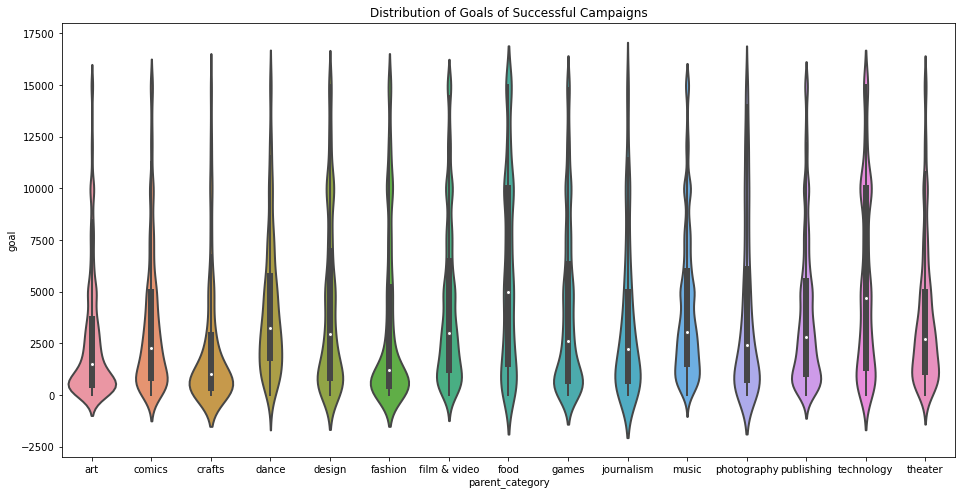

In [265]:
plt.figure(figsize=(16,8))
#we'll exclude projects with goals over 15000 for this plot - there aren't many, and they don't change the plot much
sns.violinplot(data=df[(df['goal']<=15000) & (df['success']==1)].sort_values('parent_category'),
               x = 'parent_category', y = 'goal', linewidth = 2)
plt.title('Distribution of Goals of Successful Campaigns')

Text(0.5, 1.0, 'Distribution of Goals of Unsuccessful Campaigns')

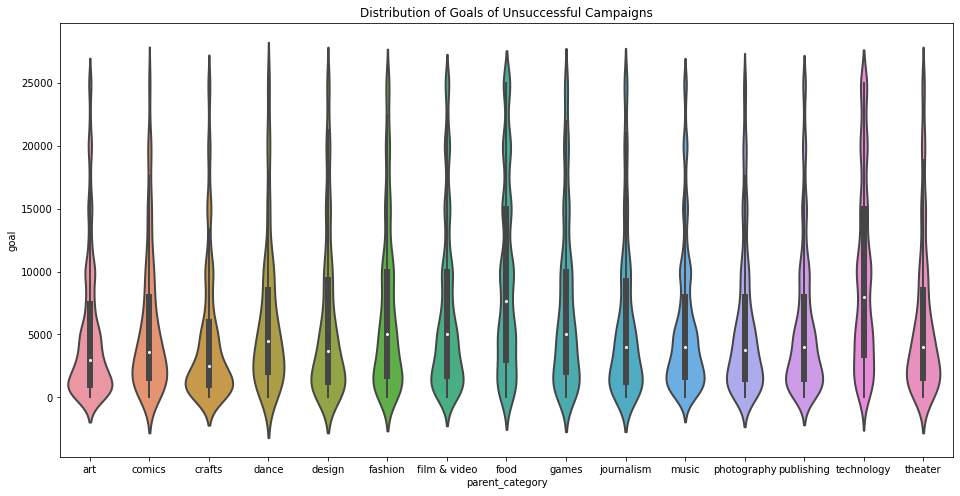

In [266]:
plt.figure(figsize=(16,8))
#this time we'll limit to goals of 25000 or less, as again the shapes don't change much above that, and there's not much data
sns.violinplot(data=df[(df['goal']<=25000) & (df['success']==0)].sort_values('parent_category'),
               x = 'parent_category', y = 'goal', linewidth=2)
plt.title('Distribution of Goals of Unsuccessful Campaigns')

From the plots, we see that projects with higher goals are less likely to succeed, which is unsurprising.

<AxesSubplot:xlabel='parent_category', ylabel='backers_count'>

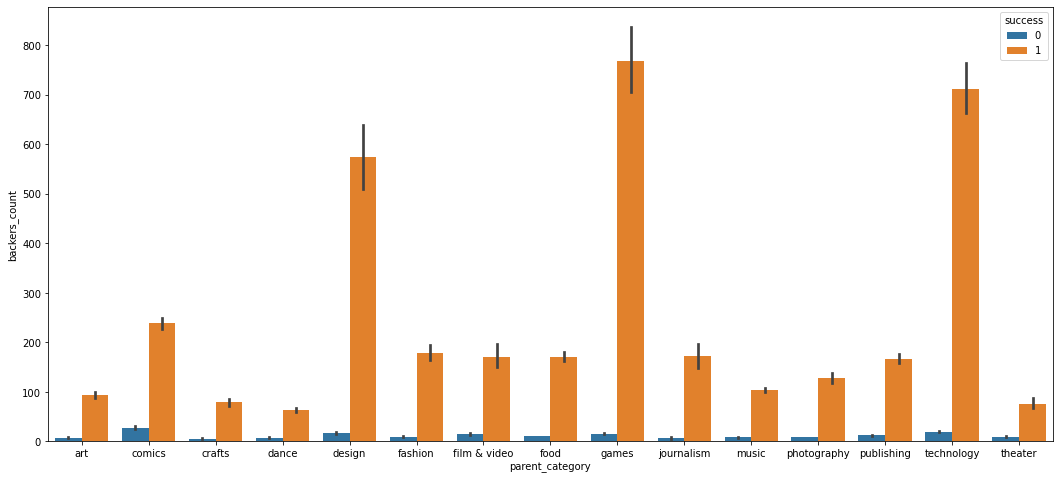

In [267]:
plt.figure(figsize = (18,8))
#seaborn barplots show estimated central tendency values with confidence intervals, not sums or counts like a normal barplot,
#which in seaborn is a countplot
sns.barplot(data = df.sort_values('parent_category'), x='parent_category', y='backers_count', hue = 'success')

Unsurprisingly, we see that projects which are successful have more backers than those that fail. More importantly, most categories have a similar range of backer numbers, except for design, games and technology which seem to attract considerably more backers than other categories. Let's check how the numbers vary by category.

In [268]:
df.groupby('parent_category').median()

,backers_count,goal,staff_pick,static_usd_rate,usd_pledged,success,preparation_time,project_duration,mean_pledge,name_word_count,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
parent_category,,,,,,,,,,,,,,,,,,,,,
art,18,2488.870,0,1.0,824.476620,1,8,30,41.250,4,...,0.943866,3,24,6,2,25,6,3,26,6
comics,88,2913.080,0,1.0,3184.000000,1,19,30,34.650,4,...,0.507698,3,24,6,2,24,6,3,26,7
crafts,4,2218.660,0,1.0,105.471638,0,5,30,25.000,4,...,0.505976,3,27,7,2,28,7,3,28,7
dance,25,4000.000,0,1.0,1779.144400,1,10,30,59.100,4,...,0.944998,3,24,6,2,25,6,3,27,7
design,41,5000.000,0,1.0,2293.022613,1,17,30,47.210,5,...,0.580731,2,25,6,2,25,6,3,26,7
fashion,30,3960.890,0,1.0,1378.309901,1,13,30,44.055,5,...,0.871419,2,25,6,2,26,6,3,27,7
film & video,23,5000.000,0,1.0,1650.000000,1,9,30,58.390,3,...,0.608942,3,25,6,2,25,6,3,26,6
food,6,10500.000,0,1.0,280.000000,0,9,30,38.070,4,...,0.729543,3,27,7,2,27,7,3,28,7
games,75,5000.000,0,1.0,3080.000000,1,17,30,34.500,4,...,0.898517,3,25,6,2,24,6,3,25,6


Games and comics attract the most backers, in that order, with roughly twice as many as the next most successful category, publishing. However, the only category in which the median usd_pledged is higher than the median goal is comics - it is the only category where success is more likely than failure. 

In [269]:
df.groupby(['parent_category','success']).median().round(2).drop(['staff_pick', 'static_usd_rate'], axis=1)

backers_count      goal  usd_pledged  \
parent_category success                                         
art             0                  3.0   4000.00        60.00   
                1                 42.0   1500.00      2492.00   
comics          0                  8.0   4243.96       208.33   
                1                113.0   2500.00      4016.38   
crafts          0                  2.0   3000.00        36.00   
                1                 36.0   1000.00      2002.00   
dance           0                  3.0   5000.00        65.50   
                1                 47.0   3500.00      3850.00   
design          0                  4.0   5500.00       103.45   
                1                113.0   4800.00     10133.48   
fashion         0                  3.0   7000.00        86.58   
                1                 67.0   2000.00      4408.81   
film & video    0                  2.0   7678.29        50.00   
                1                 54.0   4214.23      5025.00   
food            0                  3.0  15000.00        66.00   
                1                 96.0   8000.00     10170.00   
games           0                  3.0   8551.07        51.00   
                1                196.5   4000.00      8261.29   
journalism      0                  2.0   5000.00        13.50   
                1                 59.5   3000.00      3800.39   
music           0                  2.0   5000.00        26.39   
                1                 62.0   3500.00      4210.00   
photography     0                  2.0   4613.77        41.00   
                1                 62.0   3500.00      4675.00   
publishing      0                  2.0   5000.00        53.31   
                1                 72.0   3000.00      4220.36   
technology      0                  4.0  20000.00       150.52   
                1                202.0  10000.00     25267.93   
theater         0                  3.0   5000.00        85.00   
                1                 42.0   3000.00      3292.00   

                         preparation_time  project_duration  mean_pledge  \
parent_category success                                                    
art             0                     6.0              30.0        20.25   
                1                    10.0              30.0        53.15   
comics          0                    10.0              30.0        25.50   
                1                    21.0              30.0        36.00   
crafts          0                     4.0              30.0        15.10   
                1                     8.0              30.0        51.92   
dance           0                     7.0              30.0        20.34   
                1                    11.0              30.0        76.60   
design          0                     9.0              30.0        22.80   
                1                    24.0              30.0        66.26   
fashion         0                     8.0              30.0        25.00   
                1                    16.0              30.0        57.71   
film & video    0                     6.0              30.0        19.87   
                1                    11.0              30.0        80.09   
food            0                     6.0              30.0        22.98   
                1                    21.0              30.0        89.50   
games           0                     9.0              30.0        15.30   
                1                    22.0              30.0        40.34   
journalism      0                     4.0              30.0         7.33   
                1                    10.0              30.0        54.00   
music           0                     5.0              30.0        14.25   
                1                    14.0              30.0        63.17   
photography     0                     4.0              30.0        17.20   
                1                    14.0   

Some observations:

- Across all categories, backer count is all-or-nothing - projects tend to attract many, or almost none.
- technology and games attract the most backers to successful projects, but comics is the most successful overall, likely due to the combination of low goals and high backer numbers
- Successful projects spend more time preparing their campaign, but the median project duration in every category is the same at 30 days
- Successful categories tend to have slightly longer names than unsuccessful ones
- There is generally a higher level of funding than the goal of a successful project - this makes sense, as projects with broad appeal are more likely to be funded, and have a large pool of potential backers. As well, many campaigns offer special rewards ('stretch goals') for backers after achieving levels of funding above their goal, which can encourage people to pledge more to an already successful project, and attract new funders who otherwise would have passed over the project.

Now we can graph some of the differences between successful and unsuccessful projects.

In [270]:
group_df = df.groupby(['parent_category','success']).median().round(2).reset_index().sort_values('parent_category')
#group_df is easier to type than that expression
group_df.head()

,parent_category,success,backers_count,goal,staff_pick,static_usd_rate,usd_pledged,preparation_time,project_duration,mean_pledge,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
0,art,0,3.0,4000.00,0,1.0,60.00,6.0,30.0,20.25,...,0.82,3.0,26.0,6.0,2.0,26.0,6.0,3.0,27.0,7.0
1,art,1,42.0,1500.00,0,1.0,2492.00,10.0,30.0,53.15,...,1.05,3.0,24.0,6.0,2.0,24.0,6.0,3.0,26.0,6.0
2,comics,0,8.0,4243.96,0,1.0,208.33,10.0,30.0,25.50,...,0.48,3.0,26.0,6.0,2.0,24.0,6.0,3.0,27.0,7.0
3,comics,1,113.0,2500.00,0,1.0,4016.38,21.0,30.0,36.00,...,0.51,3.0,24.0,6.0,2.0,24.0,6.0,3.0,26.0,6.0
4,crafts,0,2.0,3000.00,0,1.0,36.00,4.0,30.0,15.10,...,0.48,3.0,28.0,7.0,2.0,28.0,7.0,3.0,29.0,7.0


<AxesSubplot:xlabel='parent_category', ylabel='goal'>

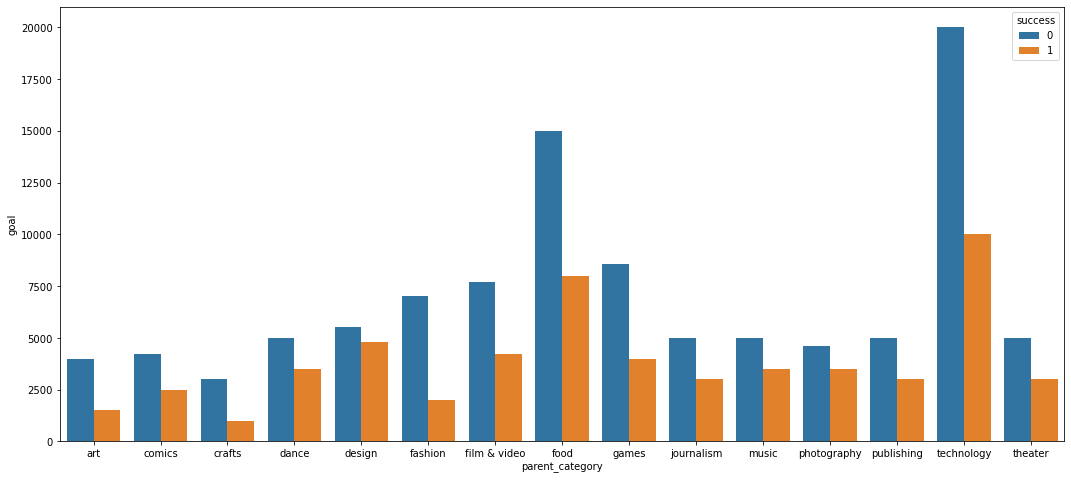

In [271]:
plt.figure(figsize = (18,8))
sns.barplot(data = group_df, x='parent_category', y='goal', hue = 'success')

<AxesSubplot:xlabel='parent_category', ylabel='usd_pledged'>

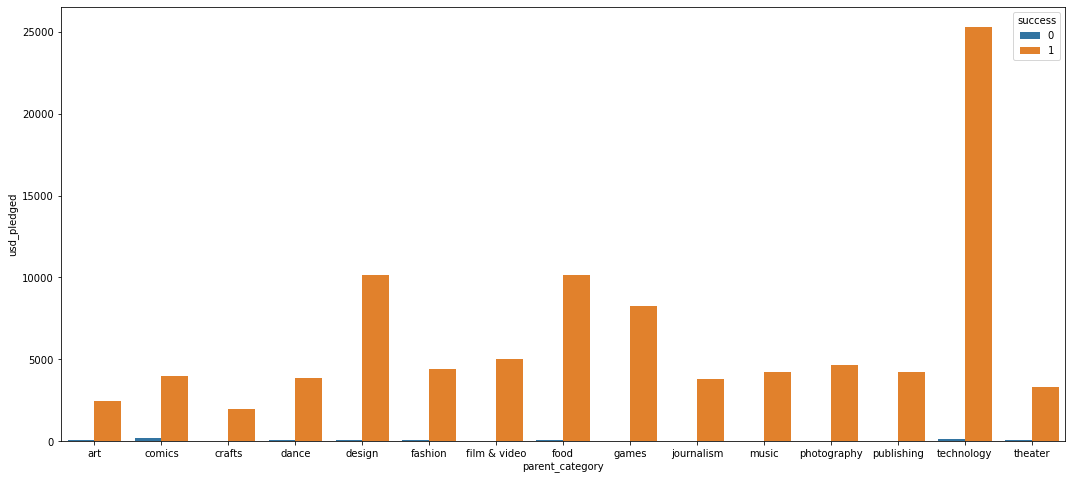

In [272]:
plt.figure(figsize = (18,8))
sns.barplot(data = group_df, x='parent_category', y='usd_pledged', hue = 'success')

<AxesSubplot:xlabel='parent_category', ylabel='preparation_time'>

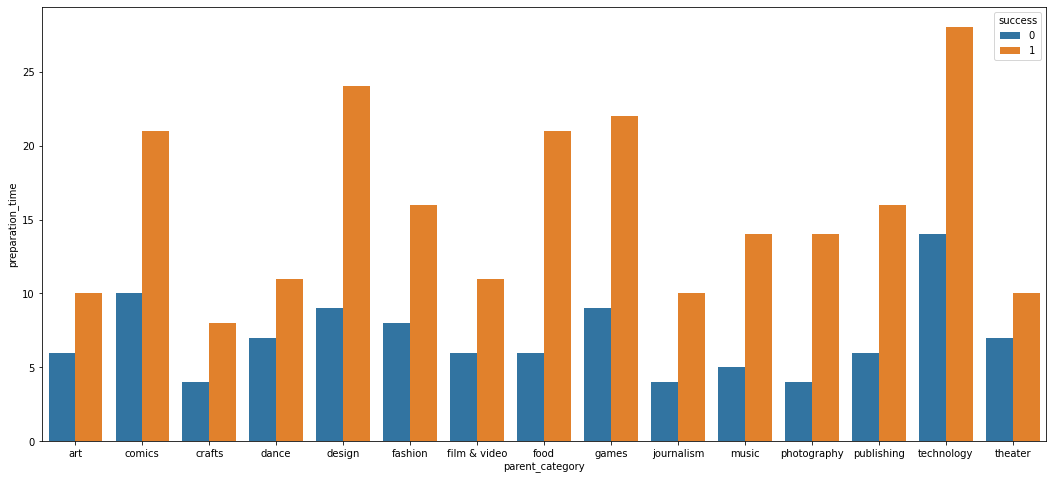

In [273]:
plt.figure(figsize = (18,8))
sns.barplot(data = group_df, x='parent_category', y='preparation_time', hue = 'success')

<AxesSubplot:xlabel='parent_category', ylabel='mean_pledge'>

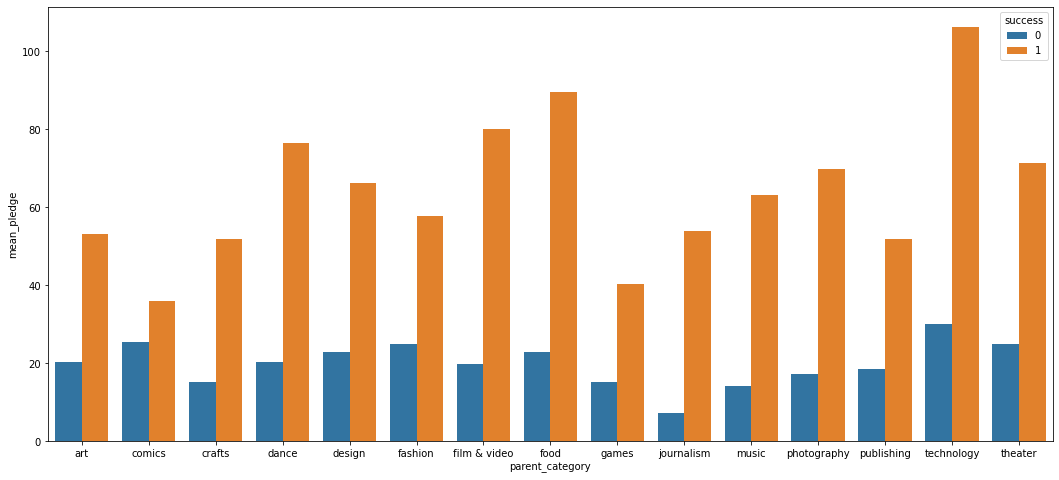

In [274]:
plt.figure(figsize = (18,8))
sns.barplot(data = group_df, x='parent_category', y='mean_pledge', hue = 'success')

In [275]:
plt.figure(figsize = (18,8))
sns.scatterplot(data = df, x='blurb_score', y='usd_pledged', hue = 'success')
plt.ylim((0,6000000))

(0.0, 6000000.0)

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1296x576 with 1 Axes>

<AxesSubplot:xlabel='staff_pick', ylabel='count'>

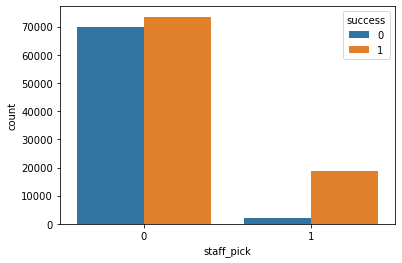

In [276]:
sns.countplot(data = df, x='staff_pick', hue = 'success')

In [277]:
group_df.head()

,parent_category,success,backers_count,goal,staff_pick,static_usd_rate,usd_pledged,preparation_time,project_duration,mean_pledge,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
0,art,0,3.0,4000.00,0,1.0,60.00,6.0,30.0,20.25,...,0.82,3.0,26.0,6.0,2.0,26.0,6.0,3.0,27.0,7.0
1,art,1,42.0,1500.00,0,1.0,2492.00,10.0,30.0,53.15,...,1.05,3.0,24.0,6.0,2.0,24.0,6.0,3.0,26.0,6.0
2,comics,0,8.0,4243.96,0,1.0,208.33,10.0,30.0,25.50,...,0.48,3.0,26.0,6.0,2.0,24.0,6.0,3.0,27.0,7.0
3,comics,1,113.0,2500.00,0,1.0,4016.38,21.0,30.0,36.00,...,0.51,3.0,24.0,6.0,2.0,24.0,6.0,3.0,26.0,6.0
4,crafts,0,2.0,3000.00,0,1.0,36.00,4.0,30.0,15.10,...,0.48,3.0,28.0,7.0,2.0,28.0,7.0,3.0,29.0,7.0


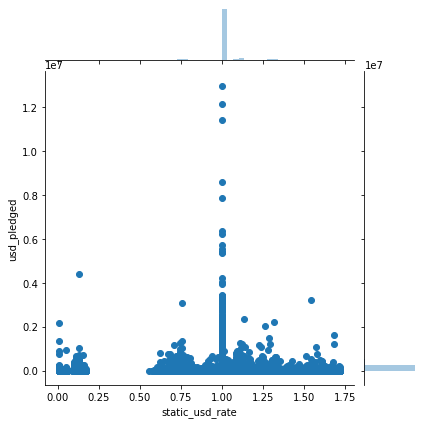

In [278]:
sns.jointplot(x='static_usd_rate', y='usd_pledged', data=df)

In [279]:
df.columns

Index(['backers_count', 'blurb', 'created_at', 'currency', 'deadline', 'goal',
       'launched_at', 'name', 'staff_pick', 'static_usd_rate', 'usd_pledged',
       'success', 'parent_category', 'sub_category', 'preparation_time',
       'project_duration', 'mean_pledge', 'name_words', 'name_word_count',
       'name_sent_count', 'blurb_words', 'blurb_word_count',
       'blurb_sent_count', 'name_score', 'blurb_score', 'day_created',
       'week_created', 'month_created', 'day_launched', 'week_launched',
       'month_launched', 'deadline_day', 'deadline_week', 'deadline_month'],
      dtype='object')

### Launch Times

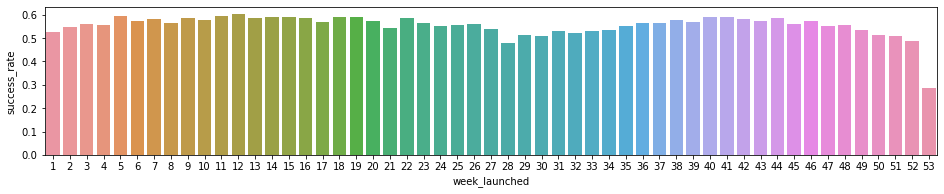

In [280]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(16,6))
plt.subplot(111)
success_proportion = df.groupby('week_launched').agg({'success':['sum', 'count']})
success_proportion['success_rate'] = success_proportion['success']['sum']/success_proportion['success']['count']
ax1 = plt.bar(data=success_proportion, x=success_proportion.index.tolist(), height = success_proportion['success']['count'],
        alpha = 1, label = 'Total Projects Launched')
ax1 = plt.bar(data=success_proportion, x=success_proportion.index.tolist(), height = success_proportion['success']['sum'], 
        color='red', label = 'Successful Projects')
plt.legend()

plt.subplot(211)
ax2 = sns.barplot(x = success_proportion.index, y = success_proportion['success_rate'])

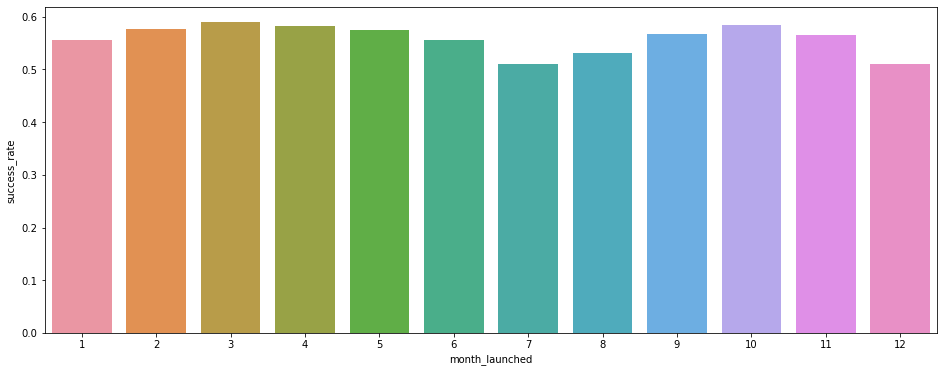

In [281]:
fig = plt.figure(figsize=(16,6))
success_proportion = df.groupby('month_launched').agg({'success':['sum', 'count']})
success_proportion['success_rate'] = success_proportion['success']['sum']/success_proportion['success']['count']

ax = sns.barplot(x = success_proportion.index, y = success_proportion['success_rate'])

We see that a project launched in the first two weeks of the year or at the end of the year has a lower likelihood of success, with this effect being much more pronounced in December. July is also a bad month for projects. 

We can also see that the proportion of successful projects is higher than that of failed projects in February, March, April and October. It does indeed look like there is some relation between launch date and success.

We'll check the days now for any bias there.

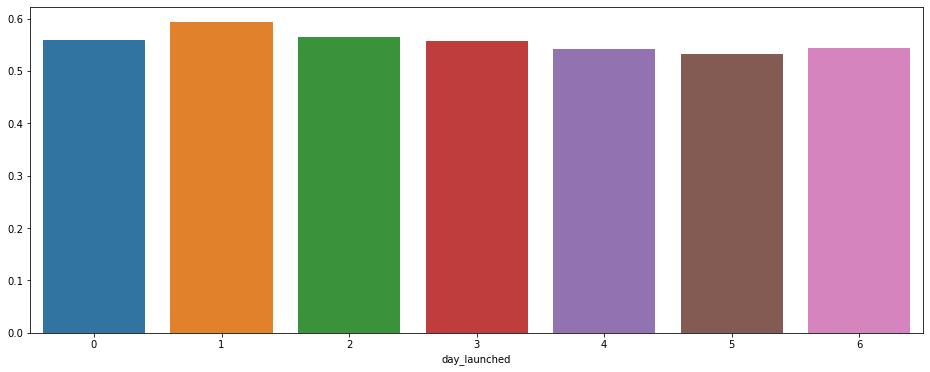

In [282]:
fig = plt.figure(figsize=(16,6))
success_proportion = df.groupby('day_launched').agg({'success':['sum', 'count']})
success_proportion = success_proportion['success']['sum']/success_proportion['success']['count']

ax = sns.barplot(x = success_proportion.index, y = success_proportion)

Projects launched at the start of the week tend to be more successful than those later in the week, particularly those launched on a Tuesday

# Making Predictions
Now we will train a model to make predictions about success and failure from our data. We are using LightGBM, a gradient boosting algorithm, for this excercise, and will optimise the hyperparameters with hyperopt.

Firstly, we need to prepare our data for training, and separate the target variable.

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
df.columns

Index(['backers_count', 'blurb', 'created_at', 'currency', 'deadline', 'goal',
       'launched_at', 'name', 'staff_pick', 'static_usd_rate', 'usd_pledged',
       'success', 'parent_category', 'sub_category', 'preparation_time',
       'project_duration', 'mean_pledge', 'name_words', 'name_word_count',
       'name_sent_count', 'blurb_words', 'blurb_word_count',
       'blurb_sent_count', 'name_score', 'blurb_score', 'day_created',
       'week_created', 'month_created', 'day_launched', 'week_launched',
       'month_launched', 'deadline_day', 'deadline_week', 'deadline_month'],
      dtype='object')

In [285]:
df = df.drop(['blurb', 'usd_pledged', 'backers_count', 'mean_pledge', 'name_words', 'blurb_words'], axis=1).set_index('name')
#y = df.set_index('name')['success']
df.head()

,created_at,currency,deadline,goal,launched_at,staff_pick,static_usd_rate,success,parent_category,sub_category,...,blurb_score,day_created,week_created,month_created,day_launched,week_launched,month_launched,deadline_day,deadline_week,deadline_month
name,,,,,,,,,,,,,,,,,,,,,
breast cancer mission impossible,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,0,1.000000,0,journalism,video,...,0.698099,4,18,5,5,18,5,2,27,7
debrianna grace cabitac: seek & behold,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,0,1.000000,1,music,faith,...,0.166336,2,43,10,0,45,11,1,52,12
liz roberson debut album!,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,0,1.000000,1,music,faith,...,0.418095,2,12,3,2,12,3,4,16,4
la forgia degli eroi - gamers café,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,0,1.058929,1,food,restaurants,...,0.150028,6,45,11,0,47,11,5,1,1
irish cream debut album: craic in the foundation,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,0,1.000000,1,music,hip-hop,...,0.288354,4,32,8,5,28,7,0,33,8


We have three columns that need converted into numbers - currency, parent_category and sub_category.

Currency actually already has one - static_usd_rate, which avoids the pitfalls of label encoding it or the computational cost of one-hot encoding.

parent_category will be one-hot encoded.

There are too many sub categories to one-hot encode - 146 in total.

In [286]:
df = pd.merge(df, pd.get_dummies(df['parent_category']), left_index=True, right_index=True)
df.head()

,created_at,currency,deadline,goal,launched_at,staff_pick,static_usd_rate,success,parent_category,sub_category,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
name,,,,,,,,,,,,,,,,,,,,,
breast cancer mission impossible,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,0,1.000000,0,journalism,video,...,0,0,0,0,1,0,0,0,0,0
debrianna grace cabitac: seek & behold,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,0,1.000000,1,music,faith,...,0,0,0,0,0,1,0,0,0,0
liz roberson debut album!,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,0,1.000000,1,music,faith,...,0,0,0,0,0,1,0,0,0,0
la forgia degli eroi - gamers café,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,0,1.058929,1,food,restaurants,...,0,0,1,0,0,0,0,0,0,0
irish cream debut album: craic in the foundation,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,0,1.000000,1,music,hip-hop,...,0,0,0,0,0,1,0,0,0,0


In [287]:
from sklearn.preprocessing import LabelEncoder

In [288]:
encoder = LabelEncoder()
df['sub_category'] = encoder.fit_transform(df['sub_category'])
df.head()

,created_at,currency,deadline,goal,launched_at,staff_pick,static_usd_rate,success,parent_category,sub_category,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
name,,,,,,,,,,,,,,,,,,,,,
breast cancer mission impossible,2017-05-05 22:08:31,USD,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,0,1.000000,0,journalism,133,...,0,0,0,0,1,0,0,0,0,0
debrianna grace cabitac: seek & behold,2016-10-26 17:35:56,USD,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,0,1.000000,1,music,42,...,0,0,0,0,0,1,0,0,0,0
liz roberson debut album!,2015-03-18 00:56:52,USD,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,0,1.000000,1,music,42,...,0,0,0,0,0,1,0,0,0,0
la forgia degli eroi - gamers café,2016-11-13 13:47:29,EUR,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,0,1.058929,1,food,110,...,0,0,1,0,0,0,0,0,0,0
irish cream debut album: craic in the foundation,2012-08-10 00:16:18,USD,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,0,1.000000,1,music,59,...,0,0,0,0,0,1,0,0,0,0


In [289]:
df.drop(['currency', 'parent_category'], axis=1, inplace=True)
df.head()

,created_at,deadline,goal,launched_at,staff_pick,static_usd_rate,success,sub_category,preparation_time,project_duration,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
name,,,,,,,,,,,,,,,,,,,,,
breast cancer mission impossible,2017-05-05 22:08:31,2017-07-05 00:02:31,1000.00,2017-05-06 00:02:31,0,1.000000,0,133,0,60,...,0,0,0,0,1,0,0,0,0,0
debrianna grace cabitac: seek & behold,2016-10-26 17:35:56,2016-12-27 08:00:31,10000.00,2016-11-07 08:00:31,0,1.000000,1,42,12,50,...,0,0,0,0,0,1,0,0,0,0
liz roberson debut album!,2015-03-18 00:56:52,2015-04-17 02:36:59,2000.00,2015-03-18 02:36:59,0,1.000000,1,42,0,30,...,0,0,0,0,0,1,0,0,0,0
la forgia degli eroi - gamers café,2016-11-13 13:47:29,2017-01-07 22:59:00,6353.58,2016-11-21 02:39:42,0,1.058929,1,110,8,48,...,0,0,1,0,0,0,0,0,0,0
irish cream debut album: craic in the foundation,2012-08-10 00:16:18,2013-08-12 18:42:28,250.00,2013-07-13 18:42:28,0,1.000000,1,59,338,30,...,0,0,0,0,0,1,0,0,0,0


In [290]:
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.metrics import mean_squared_error, roc_auc_score

In [291]:
drop_cols = ['created_at', 'launched_at', 'deadline']

train, validate, test = np.split(df.drop(drop_cols, axis=1), [int(.8 * len(df)), int(.9 * len(df))])
X_train = train.drop('success', axis = 1)
y_train = train['success']

X_validate = validate.drop('success', axis = 1)
y_validate = validate['success']

X_test = test.drop('success', axis = 1)
y_test = test['success']

#scale the data
#more useful if we were using an ensemble of LGB models, but won't hurt
#scaler = StandardScaler()

X_train.head()

,goal,staff_pick,static_usd_rate,sub_category,preparation_time,project_duration,name_word_count,name_sent_count,blurb_word_count,blurb_sent_count,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
name,,,,,,,,,,,,,,,,,,,,,
breast cancer mission impossible,1000.00,0,1.000000,133,0,60,4,1,10,1,...,0,0,0,0,1,0,0,0,0,0
debrianna grace cabitac: seek & behold,10000.00,0,1.000000,42,12,50,5,1,13,1,...,0,0,0,0,0,1,0,0,0,0
liz roberson debut album!,2000.00,0,1.000000,42,0,30,4,1,11,1,...,0,0,0,0,0,1,0,0,0,0
la forgia degli eroi - gamers café,6353.58,0,1.058929,110,8,48,4,1,14,3,...,0,0,1,0,0,0,0,0,0,0
irish cream debut album: craic in the foundation,250.00,0,1.000000,59,338,30,6,1,8,2,...,0,0,0,0,0,1,0,0,0,0


# Optimising the Hyperparameters

Hyperopt is an extremely cool algorithm - instead of searching a grid of values like GridSearch methods of hyperparameter optimisation, it utilises Bayesian statistics to search a pre-defined range of hyperparameter variables, with the advantage that it is both unconfined by a strict set of parameter variables, and that it may 

In [292]:

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_validate, label=y_validate)

params = {'num_leaves': hp.choice('num_leaves', np.arange(10,500,5)),
         'objective': 'binary',
         'num_iterations': hp.choice('num_iterations', np.arange(80,300,5)),
         'min_data': hp.choice('min_data',np.arange(10,600,5)),
         'learning_rate': hp.choice('learning_rate', np.arange(0.01,1,0.01)),
         'metric': 'auc'}
algo = tpe.suggest
def objective(params):
    num_round = 1000
    bst = lgb.train(params, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)
    
    ypred = bst.predict(X_validate)
    ypred = [1 if y > 0.6 else 0 for y in ypred] #we know more projects fail than succeed, so we set the threshold above 0.5
    score = roc_auc_score(y_validate, ypred)
    print(f"Test AUC score: {score}")
    
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, params, trials = trials, algo=algo, max_evals = 1000)
print("The best hyperparameters found were: ")
space_eval(params, best)

  0%|                                                                         | 0/1000 [00:00<?, ?trial/s, best loss=?]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972543259393211                                                                                     
  0%|                                              | 1/1000 [00:00<10:06,  1.65trial/s, best loss: -0.7972543259393211]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993178261471674                                                                                     
  0%|                                              | 2/1000 [00:00<08:45,  1.90trial/s, best loss: -0.7993178261471674]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8020083922191309                                                                                     
  0%|▏                                             | 3/1000 [00:01<08:24,  1.98trial/s, best loss: -0.8020083922191309]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048741988199839                                                                                     
  0%|▏                                             | 4/1000 [00:02<08:55,  1.86trial/s, best loss: -0.8048741988199839]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010937223222523                                                                                     
  0%|▏                                             | 5/1000 [00:02<07:56,  2.09trial/s, best loss: -0.8048741988199839]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8135785058598868                                                                                     
  1%|▎                                             | 6/1000 [00:05<19:08,  1.16s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7976562053524954                                                                                     
  1%|▎                                             | 7/1000 [00:05<15:02,  1.10trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124892549574216                                                                                     
  1%|▎                                             | 8/1000 [00:07<22:46,  1.38s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8001297660266237                                                                                     
  1%|▍                                             | 9/1000 [00:08<18:08,  1.10s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7980396107028094                                                                                     
  1%|▍                                            | 10/1000 [00:08<14:13,  1.16trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118347410672978                                                                                     
  1%|▍                                            | 11/1000 [00:12<27:59,  1.70s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7966025835291451                                                                                     
  1%|▌                                            | 12/1000 [00:12<21:21,  1.30s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8116437312621279                                                                                     
  1%|▌                                            | 13/1000 [00:16<31:57,  1.94s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8044647978770048                                                                                     
  1%|▋                                            | 14/1000 [00:16<25:01,  1.52s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8104566337788331                                                                                     
  2%|▋                                            | 15/1000 [00:19<29:57,  1.83s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7914685429022724                                                                                     
  2%|▋                                            | 16/1000 [00:19<24:21,  1.48s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.803041494716344                                                                                      
  2%|▊                                            | 17/1000 [00:20<20:26,  1.25s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8130013859178228                                                                                     
  2%|▊                                            | 18/1000 [00:21<21:06,  1.29s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996915980110317                                                                                     
  2%|▊                                            | 19/1000 [00:22<19:31,  1.19s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8012340599886982                                                                                     
  2%|▉                                            | 20/1000 [00:23<17:56,  1.10s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118669391431615                                                                                     
  2%|▉                                            | 21/1000 [00:25<18:54,  1.16s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8001194730168713                                                                                     
  2%|▉                                            | 22/1000 [00:25<14:44,  1.11trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010710910394704                                                                                     
  2%|█                                            | 23/1000 [00:25<11:48,  1.38trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811470535996515                                                                                      
  2%|█                                            | 24/1000 [00:29<24:19,  1.49s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8080693076291758                                                                                     
  2%|█▏                                           | 25/1000 [00:29<20:29,  1.26s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057251987818056                                                                                     
  3%|█▏                                           | 26/1000 [00:30<17:56,  1.11s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972248993434052                                                                                     
  3%|█▏                                           | 27/1000 [00:30<14:27,  1.12trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811196722670125                                                                                      
  3%|█▎                                           | 28/1000 [00:32<18:10,  1.12s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050247628028145                                                                                     
  3%|█▎                                           | 29/1000 [00:33<17:18,  1.07s/trial, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8044949506895916                                                                                     
  3%|█▎                                           | 30/1000 [00:34<15:16,  1.06trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7967237876094276                                                                                     
  3%|█▍                                           | 31/1000 [00:34<14:05,  1.15trial/s, best loss: -0.8135785058598868]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.814276829882233                                                                                      
  3%|█▍                                            | 32/1000 [00:36<19:16,  1.19s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102861432998006                                                                                     
  3%|█▌                                            | 33/1000 [00:39<24:36,  1.53s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8139694327400054                                                                                     
  3%|█▌                                            | 34/1000 [00:41<30:08,  1.87s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094379148179265                                                                                     
  4%|█▌                                            | 35/1000 [00:42<25:51,  1.61s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7987242107121525                                                                                     
  4%|█▋                                            | 36/1000 [00:43<19:48,  1.23s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8114581977234856                                                                                     
  4%|█▋                                            | 37/1000 [00:44<20:42,  1.29s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8037897646607437                                                                                     
  4%|█▋                                            | 38/1000 [00:45<18:02,  1.12s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.792623509003071                                                                                      
  4%|█▊                                            | 39/1000 [00:45<14:25,  1.11trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8075414740858622                                                                                     
  4%|█▊                                            | 40/1000 [00:46<13:50,  1.16trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7944412367404693                                                                                     
  4%|█▉                                            | 41/1000 [00:46<12:18,  1.30trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089901800092528                                                                                     
  4%|█▉                                            | 42/1000 [00:47<11:16,  1.42trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993266667235783                                                                                     
  4%|█▉                                            | 43/1000 [00:47<09:01,  1.77trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7973159506111009                                                                                     
  4%|██                                            | 44/1000 [00:48<07:55,  2.01trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8088580233959148                                                                                     
  4%|██                                            | 45/1000 [00:48<07:27,  2.14trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996279280759753                                                                                     
  5%|██                                            | 46/1000 [00:48<06:57,  2.29trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8028607112275586                                                                                     
  5%|██▏                                           | 47/1000 [00:49<07:01,  2.26trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.812698079302149                                                                                      
  5%|██▏                                           | 48/1000 [00:50<10:44,  1.48trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810051323362408                                                                                      
  5%|██▎                                           | 49/1000 [00:51<11:33,  1.37trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8107386948516989                                                                                     
  5%|██▎                                           | 50/1000 [00:52<13:54,  1.14trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103614252912159                                                                                     
  5%|██▎                                           | 51/1000 [00:53<12:44,  1.24trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8122037628813054                                                                                     
  5%|██▍                                           | 52/1000 [00:57<29:50,  1.89s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061578905308697                                                                                     
  5%|██▍                                           | 53/1000 [00:58<24:48,  1.57s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109317499201457                                                                                     
  5%|██▍                                           | 54/1000 [00:59<23:57,  1.52s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8016715017876194                                                                                     
  6%|██▌                                           | 55/1000 [01:00<19:10,  1.22s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8052411753707145                                                                                     
  6%|██▌                                           | 56/1000 [01:01<17:23,  1.11s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.804214208663332                                                                                      
  6%|██▌                                           | 57/1000 [01:01<14:18,  1.10trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102559904872138                                                                                     
  6%|██▋                                           | 58/1000 [01:02<13:07,  1.20trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118251742742161                                                                                     
  6%|██▋                                           | 59/1000 [01:04<18:07,  1.16s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808361661711794                                                                                      
  6%|██▊                                           | 60/1000 [01:05<16:59,  1.08s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057751447038589                                                                                     
  6%|██▊                                           | 61/1000 [01:05<13:49,  1.13trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8107776882406966                                                                                     
  6%|██▊                                           | 62/1000 [01:07<17:31,  1.12s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8070711746877743                                                                                     
  6%|██▉                                           | 63/1000 [01:08<15:49,  1.01s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089346911273041                                                                                     
  6%|██▉                                           | 64/1000 [01:10<21:36,  1.39s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8013011609270058                                                                                     
  6%|██▉                                           | 65/1000 [01:10<16:43,  1.07s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8135785058598868                                                                                     
  7%|███                                           | 66/1000 [01:13<24:02,  1.54s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053040523957323                                                                                     
  7%|███                                           | 67/1000 [01:16<33:11,  2.13s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8116540242718804                                                                                     
  7%|███▏                                          | 68/1000 [01:18<30:24,  1.96s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067151506700994                                                                                     
  7%|███▏                                          | 69/1000 [01:19<24:37,  1.59s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7992705850116942                                                                                     
  7%|███▏                                          | 70/1000 [01:19<19:39,  1.27s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106243527779181                                                                                     
  7%|███▎                                          | 71/1000 [01:20<19:21,  1.25s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009362296395524                                                                                     
  7%|███▎                                          | 72/1000 [01:21<15:52,  1.03s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060620225199492                                                                                     
  7%|███▎                                          | 73/1000 [01:21<13:46,  1.12trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041997584336579                                                                                     
  7%|███▍                                          | 74/1000 [01:24<21:08,  1.37s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8024965061567759                                                                                     
  8%|███▍                                          | 75/1000 [01:24<16:45,  1.09s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7945110424653569                                                                                     
  8%|███▍                                          | 76/1000 [01:25<13:35,  1.13trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041868273306931                                                                                     
  8%|███▌                                          | 77/1000 [01:25<10:52,  1.42trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8116868818710472                                                                                     
  8%|███▌                                          | 78/1000 [01:28<20:54,  1.36s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8040588279372767                                                                                     
  8%|███▋                                          | 79/1000 [01:28<17:01,  1.11s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8015996507994548                                                                                     
  8%|███▋                                          | 80/1000 [01:29<13:44,  1.12trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7938380545123724                                                                                     
  8%|███▋                                          | 81/1000 [01:29<11:15,  1.36trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8025841264212209                                                                                     
  8%|███▊                                          | 82/1000 [01:30<09:26,  1.62trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079844588446787                                                                                     
  8%|███▊                                          | 83/1000 [01:30<08:18,  1.84trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8030182039102588                                                                                     
  8%|███▊                                          | 84/1000 [01:30<08:15,  1.85trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7975205510425388                                                                                     
  8%|███▉                                          | 85/1000 [01:31<09:30,  1.60trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8019940086828244                                                                                     
  9%|███▉                                          | 86/1000 [01:32<08:53,  1.71trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8114232948610418                                                                                     
  9%|████                                          | 87/1000 [01:34<14:38,  1.04trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8044647978770048                                                                                     
  9%|████                                          | 88/1000 [01:34<11:56,  1.27trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7755048702757679                                                                                     
  9%|████                                          | 89/1000 [01:37<20:35,  1.36s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034481241793752                                                                                     
  9%|████▏                                         | 90/1000 [01:37<16:09,  1.06s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031174362310624                                                                                     
  9%|████▏                                         | 91/1000 [01:37<13:20,  1.13trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009136650501381                                                                                     
  9%|████▏                                         | 92/1000 [01:38<10:56,  1.38trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8074169056956966                                                                                     
  9%|████▎                                         | 93/1000 [01:39<11:56,  1.27trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077113050415917                                                                                     
  9%|████▎                                         | 94/1000 [01:40<11:48,  1.28trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7919881953924783                                                                                     
 10%|████▎                                         | 95/1000 [01:40<09:32,  1.58trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067206269366272                                                                                     
 10%|████▍                                         | 96/1000 [01:41<12:04,  1.25trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8108208388496159                                                                                     
 10%|████▍                                         | 97/1000 [01:43<17:38,  1.17s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8085143376512695                                                                                     
 10%|████▌                                         | 98/1000 [01:44<15:09,  1.01s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7952901247456463                                                                                     
 10%|████▌                                         | 99/1000 [01:44<11:58,  1.25trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7999154654153687                                                                                     
 10%|████▌                                        | 100/1000 [01:44<09:48,  1.53trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809181849337726                                                                                      
 10%|████▌                                        | 101/1000 [01:45<10:15,  1.46trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7970365943248154                                                                                     
 10%|████▌                                        | 102/1000 [01:46<09:13,  1.62trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8037609975881306                                                                                     
 10%|████▋                                        | 103/1000 [01:46<08:01,  1.86trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7959446386357703                                                                                     
 10%|████▋                                        | 104/1000 [01:46<06:44,  2.21trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093400015437292                                                                                     
 10%|████▋                                        | 105/1000 [01:47<07:07,  2.10trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005384407529319                                                                                     
 11%|████▊                                        | 106/1000 [01:47<06:12,  2.40trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8088812475086322                                                                                     
 11%|████▊                                        | 107/1000 [01:49<14:02,  1.06trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076756759624772                                                                                     
 11%|████▊                                        | 108/1000 [01:50<12:20,  1.20trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7946315203289686                                                                                     
 11%|████▉                                        | 109/1000 [01:50<10:17,  1.44trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8122996308922256                                                                                     
 11%|████▉                                        | 110/1000 [01:52<16:29,  1.11s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972549854626243                                                                                     
 11%|████▉                                        | 111/1000 [01:52<12:52,  1.15trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993081926607181                                                                                     
 11%|█████                                        | 112/1000 [01:53<11:55,  1.24trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093119606877871                                                                                     
 11%|█████                                        | 113/1000 [01:54<11:39,  1.27trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066706810145738                                                                                     
 11%|█████▏                                       | 114/1000 [01:54<10:56,  1.35trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031954897024254                                                                                     
 12%|█████▏                                       | 115/1000 [01:55<10:21,  1.42trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810054754365659                                                                                      
 12%|█████▏                                       | 116/1000 [01:57<14:27,  1.02trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7986742647900991                                                                                     
 12%|█████▎                                       | 117/1000 [01:57<11:19,  1.30trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050481203022674                                                                                     
 12%|█████▎                                       | 118/1000 [01:57<09:31,  1.54trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8019768536665701                                                                                     
 12%|█████▎                                       | 119/1000 [01:58<08:36,  1.70trial/s, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8121216188833882                                                                                     
 12%|█████▍                                       | 120/1000 [02:01<21:07,  1.44s/trial, best loss: -0.814276829882233]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8156556633873686                                                                                     
 12%|█████▎                                      | 121/1000 [02:04<25:10,  1.72s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7981169379575017                                                                                     
 12%|█████▎                                      | 122/1000 [02:04<18:54,  1.29s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065686772138225                                                                                     
 12%|█████▍                                      | 123/1000 [02:04<15:30,  1.06s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8013867359281737                                                                                     
 12%|█████▍                                      | 124/1000 [02:05<12:40,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8128343264420411                                                                                     
 12%|█████▌                                      | 125/1000 [02:07<19:56,  1.37s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7937537985578107                                                                                     
 13%|█████▌                                      | 126/1000 [02:08<15:35,  1.07s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7931835406222485                                                                                     
 13%|█████▌                                      | 127/1000 [02:08<12:13,  1.19trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7947568149358047                                                                                     
 13%|█████▋                                      | 128/1000 [02:08<10:12,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050583466186522                                                                                     
 13%|█████▋                                      | 129/1000 [02:09<10:09,  1.43trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102792812932988                                                                                     
 13%|█████▋                                      | 130/1000 [02:11<14:13,  1.02trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011224893948654                                                                                     
 13%|█████▊                                      | 131/1000 [02:11<11:48,  1.23trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7976144404835501                                                                                     
 13%|█████▊                                      | 132/1000 [02:12<09:48,  1.47trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120469964152759                                                                                     
 13%|█████▊                                      | 133/1000 [02:13<12:16,  1.18trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102033397785804                                                                                     
 13%|█████▉                                      | 134/1000 [02:14<13:39,  1.06trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7926098516834355                                                                                     
 14%|█████▉                                      | 135/1000 [02:14<11:03,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7969167759845068                                                                                     
 14%|█████▉                                      | 136/1000 [02:15<10:35,  1.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010670005129163                                                                                     
 14%|██████                                      | 137/1000 [02:15<08:57,  1.60trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8101211290872956                                                                                     
 14%|██████                                      | 138/1000 [02:16<09:48,  1.47trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972241731267345                                                                                     
 14%|██████                                      | 139/1000 [02:16<08:13,  1.74trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031154576611531                                                                                     
 14%|██████▏                                     | 140/1000 [02:17<07:20,  1.95trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8112343303191488                                                                                     
 14%|██████▏                                     | 141/1000 [02:20<17:25,  1.22s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066610475281245                                                                                     
 14%|██████▏                                     | 142/1000 [02:20<13:43,  1.04trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079810278414279                                                                                     
 14%|██████▎                                     | 143/1000 [02:21<12:43,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077277338411752                                                                                     
 14%|██████▎                                     | 144/1000 [02:22<11:56,  1.19trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7964272763068878                                                                                     
 14%|██████▍                                     | 145/1000 [02:22<09:30,  1.50trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8097103424043427                                                                                     
 15%|██████▍                                     | 146/1000 [02:24<14:45,  1.04s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7992609515252447                                                                                     
 15%|██████▍                                     | 147/1000 [02:24<11:32,  1.23trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8052144535613784                                                                                     
 15%|██████▌                                     | 148/1000 [02:24<09:41,  1.46trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7943562545692368                                                                                     
 15%|██████▌                                     | 149/1000 [02:25<08:30,  1.67trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7971139882728754                                                                                     
 15%|██████▌                                     | 150/1000 [02:25<07:07,  1.99trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8019069145549472                                                                                     
 15%|██████▋                                     | 151/1000 [02:27<11:16,  1.25trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050213984929314                                                                                     
 15%|██████▋                                     | 152/1000 [02:27<10:15,  1.38trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8007938467098293                                                                                     
 15%|██████▋                                     | 153/1000 [02:27<08:32,  1.65trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031482485669522                                                                                     
 15%|██████▊                                     | 154/1000 [02:28<08:02,  1.75trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8098260702180973                                                                                     
 16%|██████▊                                     | 155/1000 [02:29<08:46,  1.61trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8082021904591847                                                                                     
 16%|██████▊                                     | 156/1000 [02:30<12:52,  1.09trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048885823562903                                                                                     
 16%|██████▉                                     | 157/1000 [02:31<10:49,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093023272013375                                                                                     
 16%|██████▉                                     | 158/1000 [02:32<11:31,  1.22trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7952525170966225                                                                                     
 16%|██████▉                                     | 159/1000 [02:32<09:34,  1.46trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068527835499653                                                                                     
 16%|███████                                     | 160/1000 [02:33<10:08,  1.38trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8044216472680855                                                                                     
 16%|███████                                     | 161/1000 [02:33<08:43,  1.60trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8126214115707597                                                                                     
 16%|███████▏                                    | 162/1000 [02:34<10:24,  1.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996367686523862                                                                                     
 16%|███████▏                                    | 163/1000 [02:35<12:12,  1.14trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7987591135745962                                                                                     
 16%|███████▏                                    | 164/1000 [02:36<09:47,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093420468070062                                                                                     
 16%|███████▎                                    | 165/1000 [02:36<09:00,  1.55trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119792359536653                                                                                     
 17%|███████▎                                    | 166/1000 [02:38<11:59,  1.16trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8004138723627664                                                                                     
 17%|███████▎                                    | 167/1000 [02:38<09:33,  1.45trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8033351678455682                                                                                     
 17%|███████▍                                    | 168/1000 [02:38<08:21,  1.66trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089243981175515                                                                                     
 17%|███████▍                                    | 169/1000 [02:43<26:19,  1.90s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132615419245773                                                                                     
 17%|███████▍                                    | 170/1000 [02:46<28:53,  2.09s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8055560940427469                                                                                     
 17%|███████▌                                    | 171/1000 [02:47<23:30,  1.70s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118957062157744                                                                                     
 17%|███████▌                                    | 172/1000 [02:48<21:18,  1.54s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8107914122536999                                                                                     
 17%|███████▌                                    | 173/1000 [02:48<17:44,  1.29s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8072286006771068                                                                                     
 17%|███████▋                                    | 174/1000 [02:49<15:33,  1.13s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011991571262546                                                                                     
 18%|███████▋                                    | 175/1000 [02:50<13:47,  1.00s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8096076790802885                                                                                     
 18%|███████▋                                    | 176/1000 [02:51<16:06,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8104510908189376                                                                                     
 18%|███████▊                                    | 177/1000 [02:56<28:47,  2.10s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996477878788094                                                                                     
 18%|███████▊                                    | 178/1000 [02:56<22:58,  1.68s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8000736176213719                                                                                     
 18%|███████▉                                    | 179/1000 [02:57<19:28,  1.42s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078845003072045                                                                                     
 18%|███████▉                                    | 180/1000 [02:58<16:01,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7924090750050806                                                                                     
 18%|███████▉                                    | 181/1000 [02:59<16:02,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8033577324349825                                                                                     
 18%|████████                                    | 182/1000 [02:59<12:55,  1.05trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8004419132187085                                                                                     
 18%|████████                                    | 183/1000 [03:00<10:00,  1.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7985496297065657                                                                                     
 18%|████████                                    | 184/1000 [03:00<08:18,  1.64trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7954982895670706                                                                                     
 18%|████████▏                                   | 185/1000 [03:00<06:56,  1.96trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7977500281001388                                                                                     
 19%|████████▏                                   | 186/1000 [03:01<06:49,  1.99trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010998581120833                                                                                     
 19%|████████▏                                   | 187/1000 [03:01<06:40,  2.03trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.799171285997523                                                                                      
 19%|████████▎                                   | 188/1000 [03:02<06:12,  2.18trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7868569262455535                                                                                     
 19%|████████▎                                   | 189/1000 [03:02<05:46,  2.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.807222398193908                                                                                      
 19%|████████▎                                   | 190/1000 [03:03<09:09,  1.47trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978472151576655                                                                                     
 19%|████████▍                                   | 191/1000 [03:04<08:42,  1.55trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8042539282690008                                                                                     
 19%|████████▍                                   | 192/1000 [03:04<08:34,  1.57trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117087869371584                                                                                     
 19%|████████▍                                   | 193/1000 [03:07<17:23,  1.29s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022418264165493                                                                                     
 19%|████████▌                                   | 194/1000 [03:08<13:39,  1.02s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8047646734894278                                                                                     
 20%|████████▌                                   | 195/1000 [03:08<11:39,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7971851797377367                                                                                     
 20%|████████▌                                   | 196/1000 [03:08<09:22,  1.43trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061715478505054                                                                                     
 20%|████████▋                                   | 197/1000 [03:09<10:38,  1.26trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.800806844506162                                                                                      
 20%|████████▋                                   | 198/1000 [03:10<10:31,  1.27trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7956132911641544                                                                                     
 20%|████████▊                                   | 199/1000 [03:11<08:56,  1.49trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810515486970665                                                                                      
 20%|████████▊                                   | 200/1000 [03:15<22:15,  1.67s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118594176133568                                                                                     
 20%|████████▊                                   | 201/1000 [03:17<26:06,  1.96s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7955674357686549                                                                                     
 20%|████████▉                                   | 202/1000 [03:18<19:57,  1.50s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8056512358369965                                                                                     
 20%|████████▉                                   | 203/1000 [03:19<17:32,  1.32s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057053389789715                                                                                     
 20%|████████▉                                   | 204/1000 [03:19<15:57,  1.20s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106058787150578                                                                                     
 20%|█████████                                   | 205/1000 [03:20<14:21,  1.08s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810271100240191                                                                                      
 21%|█████████                                   | 206/1000 [03:21<13:37,  1.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7807902011021419                                                                                     
 21%|█████████                                   | 207/1000 [03:25<25:33,  1.93s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094084882220105                                                                                     
 21%|█████████▏                                  | 208/1000 [03:27<23:00,  1.74s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8085068161214647                                                                                     
 21%|█████████▏                                  | 209/1000 [03:27<19:01,  1.44s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031352507706195                                                                                     
 21%|█████████▏                                  | 210/1000 [03:28<15:19,  1.16s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.802194585281076                                                                                      
 21%|█████████▎                                  | 211/1000 [03:28<12:04,  1.09trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064639019331237                                                                                     
 21%|█████████▎                                  | 212/1000 [03:29<11:21,  1.16trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7999093296255378                                                                                     
 21%|█████████▎                                  | 213/1000 [03:29<10:10,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.795977496234937                                                                                      
 21%|█████████▍                                  | 214/1000 [03:30<09:14,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8030202491735358                                                                                     
 22%|█████████▍                                  | 215/1000 [03:31<09:18,  1.40trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8073169471582223                                                                                     
 22%|█████████▌                                  | 216/1000 [03:31<08:32,  1.53trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131923957229928                                                                                     
 22%|█████████▌                                  | 217/1000 [03:34<16:22,  1.26s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132108697858532                                                                                     
 22%|█████████▌                                  | 218/1000 [03:37<24:45,  1.90s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034529409225998                                                                                     
 22%|█████████▋                                  | 219/1000 [03:38<18:47,  1.44s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032420713145956                                                                                     
 22%|█████████▋                                  | 220/1000 [03:38<14:31,  1.12s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7977917262757168                                                                                     
 22%|█████████▋                                  | 221/1000 [03:38<11:16,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8115458846812982                                                                                     
 22%|█████████▊                                  | 222/1000 [03:40<13:56,  1.08s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7882802960995822                                                                                     
 22%|█████████▊                                  | 223/1000 [03:41<12:26,  1.04trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089717059463924                                                                                     
 22%|█████████▊                                  | 224/1000 [03:42<13:53,  1.07s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8002187720310424                                                                                     
 22%|█████████▉                                  | 225/1000 [03:43<12:24,  1.04trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997244556101987                                                                                     
 23%|█████████▉                                  | 226/1000 [03:44<12:51,  1.00trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8002810562261252                                                                                     
 23%|█████████▉                                  | 227/1000 [03:44<10:44,  1.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8056580311501305                                                                                     
 23%|██████████                                  | 228/1000 [03:46<13:09,  1.02s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119833264802192                                                                                     
 23%|██████████                                  | 229/1000 [03:47<15:37,  1.22s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.791887577331701                                                                                      
 23%|██████████                                  | 230/1000 [03:48<12:34,  1.02trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808688259133553                                                                                      
 23%|██████████▏                                 | 231/1000 [03:48<10:55,  1.17trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8036206599216849                                                                                     
 23%|██████████▏                                 | 232/1000 [03:49<09:33,  1.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8049350972750927                                                                                     
 23%|██████████▎                                 | 233/1000 [03:49<08:25,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117355087464944                                                                                     
 23%|██████████▎                                 | 234/1000 [03:50<10:41,  1.19trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7963862376546129                                                                                     
 24%|██████████▎                                 | 235/1000 [03:51<08:43,  1.46trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8054670880383281                                                                                     
 24%|██████████▍                                 | 236/1000 [03:51<08:06,  1.57trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076927642853636                                                                                     
 24%|██████████▍                                 | 237/1000 [03:52<07:08,  1.78trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079605085152907                                                                                     
 24%|██████████▍                                 | 238/1000 [03:52<07:18,  1.74trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.794094779515876                                                                                      
 24%|██████████▌                                 | 239/1000 [03:53<06:35,  1.92trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058066165630519                                                                                     
 24%|██████████▌                                 | 240/1000 [03:54<07:48,  1.62trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078488712280899                                                                                     
 24%|██████████▌                                 | 241/1000 [03:54<07:45,  1.63trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005501195026584                                                                                     
 24%|██████████▋                                 | 242/1000 [03:55<06:58,  1.81trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7962369927183883                                                                                     
 24%|██████████▋                                 | 243/1000 [03:55<06:13,  2.03trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.80888401898858                                                                                       
 24%|██████████▋                                 | 244/1000 [03:55<06:34,  1.92trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132635871878543                                                                                     
 24%|██████████▊                                 | 245/1000 [03:58<13:45,  1.09s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063974605181191                                                                                     
 25%|██████████▊                                 | 246/1000 [03:59<12:58,  1.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.80976167406637                                                                                       
 25%|██████████▊                                 | 247/1000 [04:00<15:10,  1.21s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7931362994867752                                                                                     
 25%|██████████▉                                 | 248/1000 [04:01<11:43,  1.07trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797891025289888                                                                                      
 25%|██████████▉                                 | 249/1000 [04:01<09:24,  1.33trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7985640132428722                                                                                     
 25%|███████████                                 | 250/1000 [04:01<07:59,  1.56trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7931904026287502                                                                                     
 25%|███████████                                 | 251/1000 [04:02<07:10,  1.74trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8049960624235692                                                                                     
 25%|███████████                                 | 252/1000 [04:02<06:09,  2.02trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8036788535902137                                                                                     
 25%|███████████▏                                | 253/1000 [04:03<06:33,  1.90trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7916383738580021                                                                                     
 25%|███████████▏                                | 254/1000 [04:03<05:55,  2.10trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7974268616816309                                                                                     
 26%|███████████▏                                | 255/1000 [04:04<05:39,  2.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810872170511643                                                                                      
 26%|███████████▎                                | 256/1000 [04:06<13:57,  1.13s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.81125353059868                                                                                       
 26%|███████████▎                                | 257/1000 [04:07<13:47,  1.11s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8141364922157872                                                                                     
 26%|███████████▎                                | 258/1000 [04:10<19:52,  1.61s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124255850223651                                                                                     
 26%|███████████▍                                | 259/1000 [04:13<24:33,  1.99s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133765435216611                                                                                     
 26%|███████████▍                                | 260/1000 [04:16<28:27,  2.31s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8082247550485989                                                                                     
 26%|███████████▍                                | 261/1000 [04:17<23:00,  1.87s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8006938881723551                                                                                     
 26%|███████████▌                                | 262/1000 [04:17<17:49,  1.45s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8082760867106261                                                                                     
 26%|███████████▌                                | 263/1000 [04:18<15:50,  1.29s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8098362965344822                                                                                     
 26%|███████████▌                                | 264/1000 [04:19<14:18,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041286336621642                                                                                     
 26%|███████████▋                                | 265/1000 [04:19<11:19,  1.08trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8081596993735684                                                                                     
 27%|███████████▋                                | 266/1000 [04:20<09:32,  1.28trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8054992861141919                                                                                     
 27%|███████████▋                                | 267/1000 [04:20<08:41,  1.40trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7911269024209041                                                                                     
 27%|███████████▊                                | 268/1000 [04:21<08:02,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109659932592864                                                                                     
 27%|███████████▊                                | 269/1000 [04:22<09:37,  1.27trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8045613254112284                                                                                     
 27%|███████████▉                                | 270/1000 [04:23<08:20,  1.46trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8126782194993147                                                                                     
 27%|███████████▉                                | 271/1000 [04:26<16:45,  1.38s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809505675279537                                                                                      
 27%|███████████▉                                | 272/1000 [04:28<21:20,  1.76s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050747754182357                                                                                     
 27%|████████████                                | 273/1000 [04:29<16:14,  1.34s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065474316710145                                                                                     
 27%|████████████                                | 274/1000 [04:29<13:47,  1.14s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8059668807256998                                                                                     
 28%|████████████                                | 275/1000 [04:30<10:58,  1.10trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064207513242042                                                                                     
 28%|████████████▏                               | 276/1000 [04:30<09:56,  1.21trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972219944767222                                                                                     
 28%|████████████▏                               | 277/1000 [04:33<15:22,  1.28s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7962096113857494                                                                                     
 28%|████████████▏                               | 278/1000 [04:33<12:04,  1.00s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118635081399107                                                                                     
 28%|████████████▎                               | 279/1000 [04:38<26:15,  2.18s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110816543796734                                                                                     
 28%|████████████▎                               | 280/1000 [04:39<21:20,  1.78s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065446601910667                                                                                     
 28%|████████████▎                               | 281/1000 [04:39<16:38,  1.39s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123071524220304                                                                                     
 28%|████████████▍                               | 282/1000 [04:41<20:01,  1.67s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7982162369716729                                                                                     
 28%|████████████▍                               | 283/1000 [04:42<15:31,  1.30s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8083541401819893                                                                                     
 28%|████████████▍                               | 284/1000 [04:44<17:33,  1.47s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7998141211379205                                                                                     
 28%|████████████▌                               | 285/1000 [04:44<14:13,  1.19s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8069239750148266                                                                                     
 29%|████████████▌                               | 286/1000 [04:45<12:16,  1.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118943204758005                                                                                     
 29%|████████████▋                               | 287/1000 [04:48<18:35,  1.56s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8073210376847761                                                                                     
 29%|████████████▋                               | 288/1000 [04:50<19:15,  1.62s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8017906606046249                                                                                     
 29%|████████████▋                               | 289/1000 [04:50<15:41,  1.32s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032078279754549                                                                                     
 29%|████████████▊                               | 290/1000 [04:51<12:41,  1.07s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7977719331662501                                                                                     
 29%|████████████▊                               | 291/1000 [04:51<10:21,  1.14trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005336907030749                                                                                     
 29%|████████████▊                               | 292/1000 [04:52<09:09,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997415439330852                                                                                     
 29%|████████████▉                               | 293/1000 [04:52<07:18,  1.61trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110659517967608                                                                                     
 29%|████████████▉                               | 294/1000 [04:55<14:32,  1.24s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7913734011080228                                                                                     
 30%|████████████▉                               | 295/1000 [04:55<11:24,  1.03trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7959932655112174                                                                                     
 30%|█████████████                               | 296/1000 [04:55<09:10,  1.28trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102786217699957                                                                                     
 30%|█████████████                               | 297/1000 [04:57<10:59,  1.07trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064631757164528                                                                                     
 30%|█████████████                               | 298/1000 [04:57<09:03,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.807708533561644                                                                                      
 30%|█████████████▏                              | 299/1000 [04:58<08:56,  1.31trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7943266945865853                                                                                     
 30%|█████████████▏                              | 300/1000 [05:02<19:59,  1.71s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8029127691062568                                                                                     
 30%|█████████████▏                              | 301/1000 [05:02<16:41,  1.43s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8071095085534689                                                                                     
 30%|█████████████▎                              | 302/1000 [05:03<13:34,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7938476213054543                                                                                     
 30%|█████████████▎                              | 303/1000 [05:03<10:45,  1.08trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068897316756859                                                                                     
 30%|█████████████▍                              | 304/1000 [05:04<10:22,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123797296268658                                                                                     
 30%|█████████████▍                              | 305/1000 [05:06<13:37,  1.18s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031441580403983                                                                                     
 31%|█████████████▍                              | 306/1000 [05:06<10:46,  1.07trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078071063591445                                                                                     
 31%|█████████████▌                              | 307/1000 [05:07<08:51,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8027607526900844                                                                                     
 31%|█████████████▌                              | 308/1000 [05:07<07:34,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124379232953945                                                                                     
 31%|█████████████▌                              | 309/1000 [05:09<11:29,  1.00trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8055964731717185                                                                                     
 31%|█████████████▋                              | 310/1000 [05:09<10:07,  1.14trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8052514016870991                                                                                     
 31%|█████████████▋                              | 311/1000 [05:10<09:11,  1.25trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993581385827713                                                                                     
 31%|█████████████▋                              | 312/1000 [05:10<07:33,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009033720403854                                                                                     
 31%|█████████████▊                              | 313/1000 [05:11<06:28,  1.77trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7982599804105277                                                                                     
 31%|█████████████▊                              | 314/1000 [05:11<05:35,  2.04trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7913226622759311                                                                                     
 32%|█████████████▊                              | 315/1000 [05:11<05:01,  2.27trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041286336621642                                                                                     
 32%|█████████████▉                              | 316/1000 [05:12<04:34,  2.49trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058039117764718                                                                                     
 32%|█████████████▉                              | 317/1000 [05:12<05:08,  2.22trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8046455146724223                                                                                     
 32%|█████████████▉                              | 318/1000 [05:13<04:49,  2.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7974562882775468                                                                                     
 32%|██████████████                              | 319/1000 [05:13<04:34,  2.48trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808365092715045                                                                                      
 32%|██████████████                              | 320/1000 [05:14<06:26,  1.76trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078084920991184                                                                                     
 32%|██████████████                              | 321/1000 [05:15<07:46,  1.45trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8037397520453227                                                                                     
 32%|██████████████▏                             | 322/1000 [05:15<06:46,  1.67trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8002701036930695                                                                                     
 32%|██████████████▏                             | 323/1000 [05:16<05:52,  1.92trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808904605008085                                                                                      
 32%|██████████████▎                             | 324/1000 [05:16<06:36,  1.71trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8140111976089508                                                                                     
 32%|██████████████▎                             | 325/1000 [05:19<13:10,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8127069865719277                                                                                     
 33%|██████████████▎                             | 326/1000 [05:23<21:28,  1.91s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8091263604557771                                                                                     
 33%|██████████████▍                             | 327/1000 [05:24<21:03,  1.88s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.81079411704028                                                                                       
 33%|██████████████▍                             | 328/1000 [05:27<22:09,  1.98s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008753311844434                                                                                     
 33%|██████████████▍                             | 329/1000 [05:27<16:45,  1.50s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022349644100476                                                                                     
 33%|██████████████▌                             | 330/1000 [05:27<13:04,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8146807545586845                                                                                     
 33%|██████████████▌                             | 331/1000 [05:31<20:53,  1.87s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8134710257926078                                                                                     
 33%|██████████████▌                             | 332/1000 [05:34<24:51,  2.23s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123852058933936                                                                                     
 33%|██████████████▋                             | 333/1000 [05:36<24:16,  2.18s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8146807545586845                                                                                     
 33%|██████████████▋                             | 334/1000 [05:40<28:39,  2.58s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8100375993494048                                                                                     
 34%|██████████████▋                             | 335/1000 [05:42<28:16,  2.55s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067527583191232                                                                                     
 34%|██████████████▊                             | 336/1000 [05:43<21:51,  1.97s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8126487929033989                                                                                     
 34%|██████████████▊                             | 337/1000 [05:47<30:37,  2.77s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.813573029593359                                                                                      
 34%|██████████████▊                             | 338/1000 [05:52<35:42,  3.24s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8004337321656007                                                                                     
 34%|██████████████▉                             | 339/1000 [05:52<26:33,  2.41s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7950690288212573                                                                                     
 34%|██████████████▉                             | 340/1000 [05:52<19:35,  1.78s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8026964232317246                                                                                     
 34%|███████████████                             | 341/1000 [05:53<15:02,  1.37s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.813900286538421                                                                                      
 34%|███████████████                             | 342/1000 [05:58<28:01,  2.56s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7967573047318974                                                                                     
 34%|███████████████                             | 343/1000 [05:58<20:45,  1.90s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8028750947638651                                                                                     
 34%|███████████████▏                            | 344/1000 [05:59<15:32,  1.42s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034303096398179                                                                                     
 34%|███████████████▏                            | 345/1000 [05:59<12:09,  1.11s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7951792136751165                                                                                     
 35%|███████████████▏                            | 346/1000 [05:59<09:29,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123016761555025                                                                                     
 35%|███████████████▎                            | 347/1000 [06:02<14:08,  1.30s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065856988433413                                                                                     
 35%|███████████████▎                            | 348/1000 [06:03<12:34,  1.16s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.800422779632545                                                                                      
 35%|███████████████▎                            | 349/1000 [06:03<09:53,  1.10trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8105373920367763                                                                                     
 35%|███████████████▍                            | 350/1000 [06:04<09:20,  1.16trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032625239473652                                                                                     
 35%|███████████████▍                            | 351/1000 [06:05<09:39,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7954243266222611                                                                                     
 35%|███████████████▍                            | 352/1000 [06:05<07:48,  1.38trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8091216104059202                                                                                     
 35%|███████████████▌                            | 353/1000 [06:06<09:58,  1.08trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8049611595611257                                                                                     
 35%|███████████████▌                            | 354/1000 [06:07<08:59,  1.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7956625775629046                                                                                     
 36%|███████████████▌                            | 355/1000 [06:07<07:43,  1.39trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7966881585303129                                                                                     
 36%|███████████████▋                            | 356/1000 [06:08<06:44,  1.59trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8104169141731647                                                                                     
 36%|███████████████▋                            | 357/1000 [06:09<09:34,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8130232909839342                                                                                     
 36%|███████████████▊                            | 358/1000 [06:14<20:34,  1.92s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058189548360813                                                                                     
 36%|███████████████▊                            | 359/1000 [06:14<16:14,  1.52s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066330066721823                                                                                     
 36%|███████████████▊                            | 360/1000 [06:15<13:13,  1.24s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978588272140241                                                                                     
 36%|███████████████▉                            | 361/1000 [06:15<10:25,  1.02trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008047992428851                                                                                     
 36%|███████████████▉                            | 362/1000 [06:16<08:21,  1.27trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110919473894259                                                                                     
 36%|███████████████▉                            | 363/1000 [06:16<08:16,  1.28trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8024225432119667                                                                                     
 36%|████████████████                            | 364/1000 [06:17<06:48,  1.56trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8083547997052923                                                                                     
 36%|████████████████                            | 365/1000 [06:17<06:42,  1.58trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7991226591220757                                                                                     
 37%|████████████████                            | 366/1000 [06:18<05:39,  1.86trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068938222022399                                                                                     
 37%|████████████████▏                           | 367/1000 [06:18<06:04,  1.74trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997956470750602                                                                                     
 37%|████████████████▏                           | 368/1000 [06:19<05:18,  1.99trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7937545247744815                                                                                     
 37%|████████████████▏                           | 369/1000 [06:19<04:45,  2.21trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808740976535554                                                                                      
 37%|████████████████▎                           | 370/1000 [06:19<04:36,  2.28trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103292939087199                                                                                     
 37%|████████████████▎                           | 371/1000 [06:20<06:31,  1.61trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8104415240258559                                                                                     
 37%|████████████████▎                           | 372/1000 [06:23<12:22,  1.18s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022302143601906                                                                                     
 37%|████████████████▍                           | 373/1000 [06:23<09:54,  1.06trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8001277207633467                                                                                     
 37%|████████████████▍                           | 374/1000 [06:24<08:42,  1.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8036452697743759                                                                                     
 38%|████████████████▌                           | 375/1000 [06:24<07:41,  1.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060565462534215                                                                                     
 38%|████████████████▌                           | 376/1000 [06:25<07:03,  1.47trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8055390057198603                                                                                     
 38%|████████████████▌                           | 377/1000 [06:26<07:53,  1.32trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7985263389004806                                                                                     
 38%|████████████████▋                           | 378/1000 [06:26<06:35,  1.57trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8097802148225982                                                                                     
 38%|████████████████▋                           | 379/1000 [06:27<06:49,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048865370930134                                                                                     
 38%|████████████████▋                           | 380/1000 [06:27<06:22,  1.62trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068548288132422                                                                                     
 38%|████████████████▊                           | 381/1000 [06:28<05:45,  1.79trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810300526836107                                                                                      
 38%|████████████████▊                           | 382/1000 [06:29<06:09,  1.67trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.794644518125301                                                                                      
 38%|████████████████▊                           | 383/1000 [06:29<05:11,  1.98trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120928518107753                                                                                     
 38%|████████████████▉                           | 384/1000 [06:30<07:05,  1.45trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077811107664793                                                                                     
 38%|████████████████▉                           | 385/1000 [06:31<07:51,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8105216894538636                                                                                     
 39%|████████████████▉                           | 386/1000 [06:32<08:08,  1.26trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8135695985901081                                                                                     
 39%|█████████████████                           | 387/1000 [06:37<22:49,  2.23s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106681629101405                                                                                     
 39%|█████████████████                           | 388/1000 [06:38<18:52,  1.85s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065733605703118                                                                                     
 39%|█████████████████                           | 389/1000 [06:42<24:00,  2.36s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811470535996515                                                                                      
 39%|█████████████████▏                          | 390/1000 [06:43<20:38,  2.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064892380024857                                                                                     
 39%|█████████████████▏                          | 391/1000 [06:44<15:48,  1.56s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8001906644817327                                                                                     
 39%|█████████████████▏                          | 392/1000 [06:44<12:06,  1.19s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8080118401773179                                                                                     
 39%|█████████████████▎                          | 393/1000 [06:44<10:10,  1.01s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011149011716927                                                                                     
 39%|█████████████████▎                          | 394/1000 [06:45<09:46,  1.03trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7941234798951213                                                                                     
 40%|█████████████████▍                          | 395/1000 [06:46<07:50,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8092469050127564                                                                                     
 40%|█████████████████▍                          | 396/1000 [06:47<09:51,  1.02trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050706848916818                                                                                     
 40%|█████████████████▍                          | 397/1000 [06:48<08:36,  1.17trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.803205782712178                                                                                      
 40%|█████████████████▌                          | 398/1000 [06:48<07:04,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8091449012120052                                                                                     
 40%|█████████████████▌                          | 399/1000 [06:49<06:54,  1.45trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7931589307695573                                                                                     
 40%|█████████████████▌                          | 400/1000 [06:49<05:53,  1.70trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8137709014050307                                                                                     
 40%|█████████████████▋                          | 401/1000 [06:53<15:08,  1.52s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8108283603794206                                                                                     
 40%|█████████████████▋                          | 402/1000 [06:55<17:46,  1.78s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7995731654106971                                                                                     
 40%|█████████████████▋                          | 403/1000 [06:56<13:26,  1.35s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993739078590515                                                                                     
 40%|█████████████████▊                          | 404/1000 [06:56<10:30,  1.06s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8029716222980887                                                                                     
 40%|█████████████████▊                          | 405/1000 [06:56<08:05,  1.23trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8038335747929659                                                                                     
 41%|█████████████████▊                          | 406/1000 [06:56<06:40,  1.48trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.813360774245381                                                                                      
 41%|█████████████████▉                          | 407/1000 [06:58<09:14,  1.07trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8006164942242951                                                                                     
 41%|█████████████████▉                          | 408/1000 [06:58<07:33,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8028771400271421                                                                                     
 41%|█████████████████▉                          | 409/1000 [06:59<06:06,  1.61trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7984147683066477                                                                                     
 41%|██████████████████                          | 410/1000 [06:59<05:20,  1.84trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8051104044973502                                                                                     
 41%|██████████████████                          | 411/1000 [07:00<05:06,  1.92trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8101115622942139                                                                                     
 41%|██████████████████▏                         | 412/1000 [07:01<07:53,  1.24trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8096124958235131                                                                                     
 41%|██████████████████▏                         | 413/1000 [07:02<07:48,  1.25trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997771730121996                                                                                     
 41%|██████████████████▏                         | 414/1000 [07:02<06:50,  1.43trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.802525932752692                                                                                      
 42%|██████████████████▎                         | 415/1000 [07:03<05:58,  1.63trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057601016442494                                                                                     
 42%|██████████████████▎                         | 416/1000 [07:03<06:06,  1.59trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7905264916727549                                                                                     
 42%|██████████████████▎                         | 417/1000 [07:04<05:20,  1.82trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7976288240198565                                                                                     
 42%|██████████████████▍                         | 418/1000 [07:04<04:43,  2.05trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8033358273688713                                                                                     
 42%|██████████████████▍                         | 419/1000 [07:04<04:08,  2.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7760340895590554                                                                                     
 42%|██████████████████▍                         | 420/1000 [07:07<10:16,  1.06s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065850393200382                                                                                     
 42%|██████████████████▌                         | 421/1000 [07:07<08:50,  1.09trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089736845163017                                                                                     
 42%|██████████████████▌                         | 422/1000 [07:08<09:03,  1.06trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7894652816262321                                                                                     
 42%|██████████████████▌                         | 423/1000 [07:09<07:17,  1.32trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8024999371600269                                                                                     
 42%|██████████████████▋                         | 424/1000 [07:09<06:22,  1.50trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077290528877813                                                                                     
 42%|██████████████████▋                         | 425/1000 [07:10<06:11,  1.55trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048501817972279                                                                                     
 43%|██████████████████▋                         | 426/1000 [07:10<05:12,  1.84trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7970297323183136                                                                                     
 43%|██████████████████▊                         | 427/1000 [07:10<04:25,  2.16trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078447807015359                                                                                     
 43%|██████████████████▊                         | 428/1000 [07:12<06:19,  1.51trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067802063451299                                                                                     
 43%|██████████████████▉                         | 429/1000 [07:12<06:18,  1.51trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008383163653547                                                                                     
 43%|██████████████████▉                         | 430/1000 [07:12<05:11,  1.83trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123886368966444                                                                                     
 43%|██████████████████▉                         | 431/1000 [07:15<12:17,  1.30s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8099629768812925                                                                                     
 43%|███████████████████                         | 432/1000 [07:18<14:56,  1.58s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972214683401545                                                                                     
 43%|███████████████████                         | 433/1000 [07:18<11:15,  1.19s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057860972369145                                                                                     
 43%|███████████████████                         | 434/1000 [07:18<09:08,  1.03trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972577569425721                                                                                     
 44%|███████████████████▏                        | 435/1000 [07:19<07:22,  1.28trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7897022135202691                                                                                     
 44%|███████████████████▏                        | 436/1000 [07:19<06:16,  1.50trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797150936398596                                                                                      
 44%|███████████████████▏                        | 437/1000 [07:20<05:13,  1.79trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7980156603734212                                                                                     
 44%|███████████████████▎                        | 438/1000 [07:20<04:52,  1.92trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8113835752553733                                                                                     
 44%|███████████████████▎                        | 439/1000 [07:21<07:11,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8015619764570634                                                                                     
 44%|███████████████████▎                        | 440/1000 [07:22<06:55,  1.35trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089059240546912                                                                                     
 44%|███████████████████▍                        | 441/1000 [07:23<06:20,  1.47trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7992732897982743                                                                                     
 44%|███████████████████▍                        | 442/1000 [07:23<05:50,  1.59trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8059113918437509                                                                                     
 44%|███████████████████▍                        | 443/1000 [07:24<05:56,  1.56trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123413957611711                                                                                     
 44%|███████████████████▌                        | 444/1000 [07:27<13:37,  1.47s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8024506507612768                                                                                     
 44%|███████████████████▌                        | 445/1000 [07:28<10:47,  1.17s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089155575411406                                                                                     
 45%|███████████████████▌                        | 446/1000 [07:29<11:57,  1.30s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8029182453727844                                                                                     
 45%|███████████████████▋                        | 447/1000 [07:30<09:26,  1.02s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8021630467285153                                                                                     
 45%|███████████████████▋                        | 448/1000 [07:30<07:33,  1.22trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7994724806565521                                                                                     
 45%|███████████████████▊                        | 449/1000 [07:30<06:22,  1.44trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8088655449257195                                                                                     
 45%|███████████████████▊                        | 450/1000 [07:31<06:02,  1.52trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809020266128472                                                                                      
 45%|███████████████████▊                        | 451/1000 [07:33<09:17,  1.02s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125926444981469                                                                                     
 45%|███████████████████▉                        | 452/1000 [07:35<13:44,  1.50s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7992657682684694                                                                                     
 45%|███████████████████▉                        | 453/1000 [07:36<10:28,  1.15s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972995218115176                                                                                     
 45%|███████████████████▉                        | 454/1000 [07:36<08:11,  1.11trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103491537115541                                                                                     
 46%|████████████████████                        | 455/1000 [07:37<07:18,  1.24trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7994834998829754                                                                                     
 46%|████████████████████                        | 456/1000 [07:37<06:18,  1.44trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048912871428704                                                                                     
 46%|████████████████████                        | 457/1000 [07:38<05:44,  1.58trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123194906950599                                                                                     
 46%|████████████████████▏                       | 458/1000 [07:39<07:40,  1.18trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009246175831937                                                                                     
 46%|████████████████████▏                       | 459/1000 [07:40<07:08,  1.26trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102567167038845                                                                                     
 46%|████████████████████▏                       | 460/1000 [07:40<06:45,  1.33trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7971372123855928                                                                                     
 46%|████████████████████▎                       | 461/1000 [07:40<05:27,  1.64trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053178431021035                                                                                     
 46%|████████████████████▎                       | 462/1000 [07:41<05:04,  1.77trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117019249306567                                                                                     
 46%|████████████████████▎                       | 463/1000 [07:44<11:03,  1.23s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011779115834463                                                                                     
 46%|████████████████████▍                       | 464/1000 [07:44<08:32,  1.05trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008458378951597                                                                                     
 46%|████████████████████▍                       | 465/1000 [07:44<06:49,  1.31trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972823001018956                                                                                     
 47%|████████████████████▌                       | 466/1000 [07:45<07:47,  1.14trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7981299357538343                                                                                     
 47%|████████████████████▌                       | 467/1000 [07:46<06:16,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8108571274520338                                                                                     
 47%|████████████████████▌                       | 468/1000 [07:47<06:51,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8073278996912778                                                                                     
 47%|████████████████████▋                       | 469/1000 [07:48<07:40,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7995395815948596                                                                                     
 47%|████████████████████▋                       | 470/1000 [07:48<06:17,  1.40trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8123051071587535                                                                                     
 47%|████████████████████▋                       | 471/1000 [07:51<11:57,  1.36s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060551605134476                                                                                     
 47%|████████████████████▊                       | 472/1000 [07:51<09:28,  1.08s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7951305867996692                                                                                     
 47%|████████████████████▊                       | 473/1000 [07:52<07:26,  1.18trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076769950090834                                                                                     
 47%|████████████████████▊                       | 474/1000 [07:52<06:43,  1.30trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050419178190688                                                                                     
 48%|████████████████████▉                       | 475/1000 [07:53<06:03,  1.44trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.804108114336027                                                                                      
 48%|████████████████████▉                       | 476/1000 [07:53<05:30,  1.59trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8081028914450135                                                                                     
 48%|████████████████████▉                       | 477/1000 [07:54<06:13,  1.40trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.812316059691809                                                                                      
 48%|█████████████████████                       | 478/1000 [07:56<08:48,  1.01s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076612924261708                                                                                     
 48%|█████████████████████                       | 479/1000 [07:57<09:00,  1.04s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7972632332090999                                                                                     
 48%|█████████████████████                       | 480/1000 [07:57<07:06,  1.22trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7961376937042173                                                                                     
 48%|█████████████████████▏                      | 481/1000 [07:58<05:39,  1.53trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.81174916606613                                                                                       
 48%|█████████████████████▏                      | 482/1000 [07:59<08:38,  1.00s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809125700932474                                                                                      
 48%|█████████████████████▎                      | 483/1000 [08:00<07:43,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8101252863072173                                                                                     
 48%|█████████████████████▎                      | 484/1000 [08:02<09:15,  1.08s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8096952993447333                                                                                     
 48%|█████████████████████▎                      | 485/1000 [08:02<08:14,  1.04trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124502615684241                                                                                     
 49%|█████████████████████▍                      | 486/1000 [08:07<17:44,  2.07s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058798532911903                                                                                     
 49%|█████████████████████▍                      | 487/1000 [08:08<15:02,  1.76s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058142047862243                                                                                     
 49%|█████████████████████▍                      | 488/1000 [08:09<12:57,  1.52s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8047523352163984                                                                                     
 49%|█████████████████████▌                      | 489/1000 [08:09<10:29,  1.23s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.803178401379539                                                                                      
 49%|█████████████████████▌                      | 490/1000 [08:10<08:45,  1.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057641921708034                                                                                     
 49%|█████████████████████▌                      | 491/1000 [08:10<07:07,  1.19trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8013435853192543                                                                                     
 49%|█████████████████████▋                      | 492/1000 [08:11<06:13,  1.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.80342212858671                                                                                       
 49%|█████████████████████▋                      | 493/1000 [08:11<05:27,  1.55trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032934029766229                                                                                     
 49%|█████████████████████▋                      | 494/1000 [08:12<04:44,  1.78trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7980840803583349                                                                                     
 50%|█████████████████████▊                      | 495/1000 [08:12<04:15,  1.98trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106729796533653                                                                                     
 50%|█████████████████████▊                      | 496/1000 [08:14<06:30,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8027292808308915                                                                                     
 50%|█████████████████████▊                      | 497/1000 [08:14<05:29,  1.53trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8074716683609746                                                                                     
 50%|█████████████████████▉                      | 498/1000 [08:15<06:16,  1.33trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8052356991041865                                                                                     
 50%|█████████████████████▉                      | 499/1000 [08:15<05:32,  1.51trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8043484105399471                                                                                     
 50%|██████████████████████                      | 500/1000 [08:16<05:15,  1.59trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103327249119707                                                                                     
 50%|██████████████████████                      | 501/1000 [08:17<07:42,  1.08trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053218669352898                                                                                     
 50%|██████████████████████                      | 502/1000 [08:20<11:21,  1.37s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057621469075265                                                                                     
 50%|██████████████████████▏                     | 503/1000 [08:21<09:29,  1.15s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8028969998299764                                                                                     
 50%|██████████████████████▏                     | 504/1000 [08:21<07:33,  1.09trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7986879221097347                                                                                     
 50%|██████████████████████▏                     | 505/1000 [08:21<06:03,  1.36trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8111357575216482                                                                                     
 51%|██████████████████████▎                     | 506/1000 [08:28<20:43,  2.52s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8015099185783654                                                                                     
 51%|██████████████████████▎                     | 507/1000 [08:28<15:33,  1.89s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063564218658446                                                                                     
 51%|██████████████████████▎                     | 508/1000 [08:29<12:25,  1.52s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8082247550485989                                                                                     
 51%|██████████████████████▍                     | 509/1000 [08:30<12:06,  1.48s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005371217063257                                                                                     
 51%|██████████████████████▍                     | 510/1000 [08:31<09:22,  1.15s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011936808597268                                                                                     
 51%|██████████████████████▍                     | 511/1000 [08:31<07:32,  1.08trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093159845209733                                                                                     
 51%|██████████████████████▌                     | 512/1000 [08:33<09:28,  1.16s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7959404814158485                                                                                     
 51%|██████████████████████▌                     | 513/1000 [08:33<07:15,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.806044207980392                                                                                      
 51%|██████████████████████▌                     | 514/1000 [08:34<06:44,  1.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8130328577770158                                                                                     
 52%|██████████████████████▋                     | 515/1000 [08:36<09:23,  1.16s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7876243964694843                                                                                     
 52%|██████████████████████▋                     | 516/1000 [08:36<07:20,  1.10trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063201332634269                                                                                     
 52%|██████████████████████▋                     | 517/1000 [08:36<05:53,  1.37trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8031859229093437                                                                                     
 52%|██████████████████████▊                     | 518/1000 [08:37<05:10,  1.55trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810300526836107                                                                                      
 52%|██████████████████████▊                     | 519/1000 [08:39<09:10,  1.14s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7993321429901061                                                                                     
 52%|██████████████████████▉                     | 520/1000 [08:39<07:05,  1.13trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7821704203472513                                                                                     
 52%|██████████████████████▉                     | 521/1000 [08:43<12:33,  1.57s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8069657398837722                                                                                     
 52%|██████████████████████▉                     | 522/1000 [08:43<10:46,  1.35s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8043175982040573                                                                                     
 52%|███████████████████████                     | 523/1000 [08:44<09:03,  1.14s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120285223524155                                                                                     
 52%|███████████████████████                     | 524/1000 [08:48<15:06,  1.90s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068705313961548                                                                                     
 52%|███████████████████████                     | 525/1000 [08:48<11:57,  1.51s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8089785012595264                                                                                     
 53%|███████████████████████▏                    | 526/1000 [08:49<10:26,  1.32s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8137236602695574                                                                                     
 53%|███████████████████████▏                    | 527/1000 [08:53<17:15,  2.19s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7964718126557809                                                                                     
 53%|███████████████████████▏                    | 528/1000 [08:54<12:48,  1.63s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7987420252517096                                                                                     
 53%|███████████████████████▎                    | 529/1000 [08:54<09:43,  1.24s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.806858259816493                                                                                      
 53%|███████████████████████▎                    | 530/1000 [08:55<07:50,  1.00s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119436068745509                                                                                     
 53%|███████████████████████▎                    | 531/1000 [08:56<08:41,  1.11s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060811561061129                                                                                     
 53%|███████████████████████▍                    | 532/1000 [08:56<07:06,  1.10trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7951682611420607                                                                                     
 53%|███████████████████████▍                    | 533/1000 [08:57<05:45,  1.35trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8027874744994203                                                                                     
 53%|███████████████████████▍                    | 534/1000 [08:57<05:09,  1.50trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7944733014295975                                                                                     
 54%|███████████████████████▌                    | 535/1000 [08:57<04:16,  1.82trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8086532895777414                                                                                     
 54%|███████████████████████▌                    | 536/1000 [08:58<04:05,  1.89trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7991644239910212                                                                                     
 54%|███████████████████████▋                    | 537/1000 [08:58<03:30,  2.20trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.81293910172274                                                                                       
 54%|███████████████████████▋                    | 538/1000 [09:00<06:14,  1.23trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8021589562019615                                                                                     
 54%|███████████████████████▋                    | 539/1000 [09:00<05:20,  1.44trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7967025420666193                                                                                     
 54%|███████████████████████▊                    | 540/1000 [09:01<04:54,  1.56trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008116612493867                                                                                     
 54%|███████████████████████▊                    | 541/1000 [09:01<04:13,  1.81trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797909566046116                                                                                      
 54%|███████████████████████▊                    | 542/1000 [09:02<03:55,  1.94trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8138304808135334                                                                                     
 54%|███████████████████████▉                    | 543/1000 [09:05<10:03,  1.32s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063386073262873                                                                                     
 54%|███████████████████████▉                    | 544/1000 [09:05<08:08,  1.07s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7977322135605817                                                                                     
 55%|███████████████████████▉                    | 545/1000 [09:06<06:46,  1.12trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063351763230363                                                                                     
 55%|████████████████████████                    | 546/1000 [09:06<05:44,  1.32trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8017290359328451                                                                                     
 55%|████████████████████████                    | 547/1000 [09:07<05:49,  1.29trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8018029988776544                                                                                     
 55%|████████████████████████                    | 548/1000 [09:08<05:38,  1.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7965210990545312                                                                                     
 55%|████████████████████████▏                   | 549/1000 [09:08<05:44,  1.31trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8016140343357614                                                                                     
 55%|████████████████████████▏                   | 550/1000 [09:09<05:35,  1.34trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8023718710732427                                                                                     
 55%|████████████████████████▏                   | 551/1000 [09:10<05:24,  1.38trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809838408491127                                                                                      
 55%|████████████████████████▎                   | 552/1000 [09:12<07:39,  1.03s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7958207297689078                                                                                     
 55%|████████████████████████▎                   | 553/1000 [09:12<06:31,  1.14trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8052644661767995                                                                                     
 55%|████████████████████████▍                   | 554/1000 [09:13<05:59,  1.24trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8046578529454518                                                                                     
 56%|████████████████████████▍                   | 555/1000 [09:13<04:53,  1.51trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8006363540271293                                                                                     
 56%|████████████████████████▍                   | 556/1000 [09:14<04:33,  1.62trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7950765503510621                                                                                     
 56%|████████████████████████▌                   | 557/1000 [09:14<04:25,  1.67trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7936613615501413                                                                                     
 56%|████████████████████████▌                   | 558/1000 [09:16<06:24,  1.15trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.800296099285735                                                                                      
 56%|████████████████████████▌                   | 559/1000 [09:16<05:09,  1.42trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7955208541564849                                                                                     
 56%|████████████████████████▋                   | 560/1000 [09:16<04:18,  1.70trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8145041282898209                                                                                     
 56%|████████████████████████▋                   | 561/1000 [09:19<08:21,  1.14s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066905408174081                                                                                     
 56%|████████████████████████▋                   | 562/1000 [09:19<06:51,  1.06trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064734687262054                                                                                     
 56%|████████████████████████▊                   | 563/1000 [09:20<05:42,  1.27trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811501348332405                                                                                      
 56%|████████████████████████▊                   | 564/1000 [09:22<09:37,  1.32s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7989357398434598                                                                                     
 56%|████████████████████████▊                   | 565/1000 [09:23<07:39,  1.06s/trial, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8024328362217192                                                                                     
 57%|████████████████████████▉                   | 566/1000 [09:23<05:59,  1.21trial/s, best loss: -0.8156556633873686]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.815893914328012                                                                                      
 57%|█████████████████████████▌                   | 567/1000 [09:27<12:50,  1.78s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.810216997098216                                                                                      
 57%|█████████████████████████▌                   | 568/1000 [09:30<15:58,  2.22s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8088785427220522                                                                                     
 57%|█████████████████████████▌                   | 569/1000 [09:31<12:56,  1.80s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132307295886874                                                                                     
 57%|█████████████████████████▋                   | 570/1000 [09:35<17:51,  2.49s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133984485877723                                                                                     
 57%|█████████████████████████▋                   | 571/1000 [09:41<24:08,  3.38s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7965340968508637                                                                                     
 57%|█████████████████████████▋                   | 572/1000 [09:41<17:37,  2.47s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8135531697905247                                                                                     
 57%|█████████████████████████▊                   | 573/1000 [09:45<21:50,  3.07s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103539037614111                                                                                     
 57%|█████████████████████████▊                   | 574/1000 [09:49<23:41,  3.34s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8126919435123183                                                                                     
 57%|█████████████████████████▊                   | 575/1000 [09:53<24:47,  3.50s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079461249789842                                                                                     
 58%|█████████████████████████▉                   | 576/1000 [09:54<18:42,  2.65s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8090380806680292                                                                                     
 58%|█████████████████████████▉                   | 577/1000 [09:55<15:32,  2.20s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094872012166767                                                                                     
 58%|██████████████████████████                   | 578/1000 [09:56<12:52,  1.83s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8114684907332381                                                                                     
 58%|██████████████████████████                   | 579/1000 [09:59<15:30,  2.21s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8007466055743561                                                                                     
 58%|██████████████████████████                   | 580/1000 [10:00<11:43,  1.68s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8095323970888729                                                                                     
 58%|██████████████████████████▏                  | 581/1000 [10:00<10:06,  1.45s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106900679762516                                                                                     
 58%|██████████████████████████▏                  | 582/1000 [10:02<09:37,  1.38s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8115431132013504                                                                                     
 58%|██████████████████████████▏                  | 583/1000 [10:04<12:08,  1.75s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8013421995792805                                                                                     
 58%|██████████████████████████▎                  | 584/1000 [10:05<09:10,  1.32s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8075462908290869                                                                                     
 58%|██████████████████████████▎                  | 585/1000 [10:05<07:47,  1.13s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7950580762882017                                                                                     
 59%|██████████████████████████▎                  | 586/1000 [10:06<06:13,  1.11trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064166607976503                                                                                     
 59%|██████████████████████████▍                  | 587/1000 [10:06<05:52,  1.17trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8087840604511056                                                                                     
 59%|██████████████████████████▍                  | 588/1000 [10:07<06:24,  1.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8019125242082104                                                                                     
 59%|██████████████████████████▌                  | 589/1000 [10:08<05:18,  1.29trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7952223642840357                                                                                     
 59%|██████████████████████████▌                  | 590/1000 [10:08<04:14,  1.61trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808740976535554                                                                                      
 59%|██████████████████████████▌                  | 591/1000 [10:09<03:53,  1.75trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131437688475457                                                                                     
 59%|██████████████████████████▋                  | 592/1000 [10:10<06:13,  1.09trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.805198024761795                                                                                      
 59%|██████████████████████████▋                  | 593/1000 [10:11<05:26,  1.25trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8112959549909284                                                                                     
 59%|██████████████████████████▋                  | 594/1000 [10:13<08:27,  1.25s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102389021643273                                                                                     
 60%|██████████████████████████▊                  | 595/1000 [10:14<08:14,  1.22s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8039663909296072                                                                                     
 60%|██████████████████████████▊                  | 596/1000 [10:15<06:46,  1.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.80877040313147                                                                                       
 60%|██████████████████████████▊                  | 597/1000 [10:16<07:00,  1.04s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811799178681551                                                                                      
 60%|██████████████████████████▉                  | 598/1000 [10:17<07:09,  1.07s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8056299902941882                                                                                     
 60%|██████████████████████████▉                  | 599/1000 [10:18<06:19,  1.06trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8059374541297839                                                                                     
 60%|███████████████████████████                  | 600/1000 [10:18<05:43,  1.16trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7988714103851                                                                                        
 60%|███████████████████████████                  | 601/1000 [10:19<04:46,  1.39trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8062790279177845                                                                                     
 60%|███████████████████████████                  | 602/1000 [10:19<04:37,  1.43trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120394748854711                                                                                     
 60%|███████████████████████████▏                 | 603/1000 [10:24<11:53,  1.80s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7981909009023109                                                                                     
 60%|███████████████████████████▏                 | 604/1000 [10:24<09:18,  1.41s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8062433988386699                                                                                     
 60%|███████████████████████████▏                 | 605/1000 [10:25<07:33,  1.15s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066747715411279                                                                                     
 61%|███████████████████████████▎                 | 606/1000 [10:26<06:56,  1.06s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8112268087893441                                                                                     
 61%|███████████████████████████▎                 | 607/1000 [10:27<07:45,  1.18s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8091072268696137                                                                                     
 61%|███████████████████████████▎                 | 608/1000 [10:28<07:45,  1.19s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7949662988038352                                                                                     
 61%|███████████████████████████▍                 | 609/1000 [10:29<06:06,  1.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8003296831015723                                                                                     
 61%|███████████████████████████▍                 | 610/1000 [10:29<05:12,  1.25trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7986076899883593                                                                                     
 61%|███████████████████████████▍                 | 611/1000 [10:32<09:07,  1.41s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041519244682492                                                                                     
 61%|███████████████████████████▌                 | 612/1000 [10:33<07:34,  1.17s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131937147695989                                                                                     
 61%|███████████████████████████▌                 | 613/1000 [10:35<08:57,  1.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125597868989801                                                                                     
 61%|███████████████████████████▋                 | 614/1000 [10:38<12:54,  2.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8016578444679837                                                                                     
 62%|███████████████████████████▋                 | 615/1000 [10:38<09:42,  1.51s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8042669260653331                                                                                     
 62%|███████████████████████████▋                 | 616/1000 [10:39<07:27,  1.16s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8101519414231855                                                                                     
 62%|███████████████████████████▊                 | 617/1000 [10:43<12:57,  2.03s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7966751607339804                                                                                     
 62%|███████████████████████████▊                 | 618/1000 [10:43<09:34,  1.50s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8122523897567524                                                                                     
 62%|███████████████████████████▊                 | 619/1000 [10:46<13:18,  2.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7941399753880725                                                                                     
 62%|███████████████████████████▉                 | 620/1000 [10:47<09:59,  1.58s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797341286680463                                                                                      
 62%|███████████████████████████▉                 | 621/1000 [10:47<07:33,  1.20s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7999154654153687                                                                                     
 62%|███████████████████████████▉                 | 622/1000 [10:48<06:12,  1.01trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8020590643578549                                                                                     
 62%|████████████████████████████                 | 623/1000 [10:48<05:35,  1.12trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7929827639438936                                                                                     
 62%|████████████████████████████                 | 624/1000 [10:53<12:35,  2.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8020857194738231                                                                                     
 62%|████████████████████████████▏                | 625/1000 [10:54<09:54,  1.58s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.799907943885564                                                                                      
 63%|████████████████████████████▏                | 626/1000 [10:54<07:31,  1.21s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8145588909550988                                                                                     
 63%|████████████████████████████▏                | 627/1000 [11:00<16:02,  2.58s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8062653705981487                                                                                     
 63%|████████████████████████████▎                | 628/1000 [11:00<12:15,  1.98s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120394748854711                                                                                     
 63%|████████████████████████████▎                | 629/1000 [11:02<12:14,  1.98s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8025005299899621                                                                                     
 63%|████████████████████████████▎                | 630/1000 [11:04<11:58,  1.94s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7984825287682582                                                                                     
 63%|████████████████████████████▍                | 631/1000 [11:04<08:58,  1.46s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8140262406685604                                                                                     
 63%|████████████████████████████▍                | 632/1000 [11:08<13:10,  2.15s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7904765457507016                                                                                     
 63%|████████████████████████████▍                | 633/1000 [11:09<10:27,  1.71s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8121236641466651                                                                                     
 63%|████████████████████████████▌                | 634/1000 [11:13<14:31,  2.38s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8097295426838739                                                                                     
 64%|████████████████████████████▌                | 635/1000 [11:14<11:40,  1.92s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133368239159927                                                                                     
 64%|████████████████████████████▌                | 636/1000 [11:18<16:26,  2.71s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7898172818107208                                                                                     
 64%|████████████████████████████▋                | 637/1000 [11:19<12:05,  2.00s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010450954468052                                                                                     
 64%|████████████████████████████▋                | 638/1000 [11:19<09:05,  1.51s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064912165723949                                                                                     
 64%|████████████████████████████▊                | 639/1000 [11:20<08:50,  1.47s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022151046072135                                                                                     
 64%|████████████████████████████▊                | 640/1000 [11:21<06:54,  1.15s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7944418962637723                                                                                     
 64%|████████████████████████████▊                | 641/1000 [11:21<05:26,  1.10trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094365290779526                                                                                     
 64%|████████████████████████████▉                | 642/1000 [11:22<05:27,  1.09trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8033050817263492                                                                                     
 64%|████████████████████████████▉                | 643/1000 [11:22<04:37,  1.28trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8049919718970154                                                                                     
 64%|████████████████████████████▉                | 644/1000 [11:23<04:01,  1.47trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077448221640617                                                                                     
 64%|█████████████████████████████                | 645/1000 [11:23<03:49,  1.55trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8122564802833063                                                                                     
 65%|█████████████████████████████                | 646/1000 [11:25<05:28,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119388568246939                                                                                     
 65%|█████████████████████████████                | 647/1000 [11:27<07:39,  1.30s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110707018466178                                                                                     
 65%|█████████████████████████████▏               | 648/1000 [11:28<06:29,  1.11s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060353007106134                                                                                     
 65%|█████████████████████████████▏               | 649/1000 [11:28<05:23,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053191621487098                                                                                     
 65%|█████████████████████████████▎               | 650/1000 [11:29<04:33,  1.28trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811526684401767                                                                                      
 65%|█████████████████████████████▎               | 651/1000 [11:33<11:05,  1.91s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797834876884636                                                                                      
 65%|█████████████████████████████▎               | 652/1000 [11:34<08:19,  1.44s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.807353895283943                                                                                      
 65%|█████████████████████████████▍               | 653/1000 [11:34<06:32,  1.13s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8018817118723206                                                                                     
 65%|█████████████████████████████▍               | 654/1000 [11:34<05:08,  1.12trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005596862957403                                                                                     
 66%|█████████████████████████████▍               | 655/1000 [11:35<04:39,  1.23trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.806646004468515                                                                                      
 66%|█████████████████████████████▌               | 656/1000 [11:36<04:09,  1.38trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7965772474597829                                                                                     
 66%|█████████████████████████████▌               | 657/1000 [11:36<03:32,  1.61trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7939667801224597                                                                                     
 66%|█████████████████████████████▌               | 658/1000 [11:36<03:02,  1.87trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7922167461533045                                                                                     
 66%|█████████████████████████████▋               | 659/1000 [11:37<02:39,  2.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118107907379096                                                                                     
 66%|█████████████████████████████▋               | 660/1000 [11:38<03:27,  1.64trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8039403953369421                                                                                     
 66%|█████████████████████████████▋               | 661/1000 [11:38<03:11,  1.77trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009574751823604                                                                                     
 66%|█████████████████████████████▊               | 662/1000 [11:38<02:48,  2.01trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032844957068442                                                                                     
 66%|█████████████████████████████▊               | 663/1000 [11:39<02:37,  2.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7949834538200893                                                                                     
 66%|█████████████████████████████▉               | 664/1000 [11:39<02:16,  2.46trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7987967879169876                                                                                     
 66%|█████████████████████████████▉               | 665/1000 [11:39<02:12,  2.54trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005480742393813                                                                                     
 67%|█████████████████████████████▉               | 666/1000 [11:40<02:13,  2.50trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8100588448922128                                                                                     
 67%|██████████████████████████████               | 667/1000 [11:40<02:38,  2.11trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067158768867702                                                                                     
 67%|██████████████████████████████               | 668/1000 [11:41<02:45,  2.00trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8020679049342658                                                                                     
 67%|██████████████████████████████               | 669/1000 [11:41<02:22,  2.32trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8000332384924004                                                                                     
 67%|██████████████████████████████▏              | 670/1000 [11:42<02:06,  2.60trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131218637814345                                                                                     
 67%|██████████████████████████████▏              | 671/1000 [11:44<06:02,  1.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7969935104092637                                                                                     
 67%|██████████████████████████████▏              | 672/1000 [11:45<04:46,  1.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8046598982087289                                                                                     
 67%|██████████████████████████████▎              | 673/1000 [11:45<03:59,  1.37trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064645614564268                                                                                     
 67%|██████████████████████████████▎              | 674/1000 [11:46<03:34,  1.52trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7958569516779578                                                                                     
 68%|██████████████████████████████▍              | 675/1000 [11:46<03:01,  1.79trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124009751696739                                                                                     
 68%|██████████████████████████████▍              | 676/1000 [11:47<04:33,  1.18trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065829940567614                                                                                     
 68%|██████████████████████████████▍              | 677/1000 [11:48<03:41,  1.46trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8127761327735122                                                                                     
 68%|██████████████████████████████▌              | 678/1000 [11:52<10:08,  1.89s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.801784524814794                                                                                      
 68%|██████████████████████████████▌              | 679/1000 [11:53<07:57,  1.49s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.796252035777998                                                                                      
 68%|██████████████████████████████▌              | 680/1000 [11:53<06:08,  1.15s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078536879713146                                                                                     
 68%|██████████████████████████████▋              | 681/1000 [11:54<05:21,  1.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.806124306715032                                                                                      
 68%|██████████████████████████████▋              | 682/1000 [11:54<04:27,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7944329889939937                                                                                     
 68%|██████████████████████████████▋              | 683/1000 [11:55<03:43,  1.42trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8069985307895713                                                                                     
 68%|██████████████████████████████▊              | 684/1000 [11:56<03:49,  1.38trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8042395447326941                                                                                     
 68%|██████████████████████████████▊              | 685/1000 [11:56<03:19,  1.58trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125494938892275                                                                                     
 69%|██████████████████████████████▊              | 686/1000 [11:59<07:49,  1.49s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8091613300115886                                                                                     
 69%|██████████████████████████████▉              | 687/1000 [12:00<06:13,  1.19s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7959103952966295                                                                                     
 69%|██████████████████████████████▉              | 688/1000 [12:00<04:52,  1.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7988543220622135                                                                                     
 69%|███████████████████████████████              | 689/1000 [12:01<03:55,  1.32trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8055068076439966                                                                                     
 69%|███████████████████████████████              | 690/1000 [12:01<03:47,  1.36trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8057696684373312                                                                                     
 69%|███████████████████████████████              | 691/1000 [12:02<03:18,  1.55trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811148095794678                                                                                      
 69%|███████████████████████████████▏             | 692/1000 [12:03<04:39,  1.10trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.808605388918965                                                                                      
 69%|███████████████████████████████▏             | 693/1000 [12:04<04:19,  1.18trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8082199383053742                                                                                     
 69%|███████████████████████████████▏             | 694/1000 [12:05<03:56,  1.29trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8134053105942741                                                                                     
 70%|███████████████████████████████▎             | 695/1000 [12:09<09:00,  1.77s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8090723240071699                                                                                     
 70%|███████████████████████████████▎             | 696/1000 [12:10<07:43,  1.52s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102628524937153                                                                                     
 70%|███████████████████████████████▎             | 697/1000 [12:10<06:38,  1.31s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8124009751696739                                                                                     
 70%|███████████████████████████████▍             | 698/1000 [12:11<05:57,  1.18s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8113753942022656                                                                                     
 70%|███████████████████████████████▍             | 699/1000 [12:12<05:26,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.791942999520282                                                                                      
 70%|███████████████████████████████▍             | 700/1000 [12:13<04:20,  1.15trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8081247965111247                                                                                     
 70%|███████████████████████████████▌             | 701/1000 [12:13<03:57,  1.26trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065734272636795                                                                                     
 70%|███████████████████████████████▌             | 702/1000 [12:14<03:24,  1.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7962123161723295                                                                                     
 70%|███████████████████████████████▋             | 703/1000 [12:14<03:02,  1.63trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8063379478029842                                                                                     
 70%|███████████████████████████████▋             | 704/1000 [12:15<02:57,  1.67trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076852427555591                                                                                     
 70%|███████████████████████████████▋             | 705/1000 [12:15<02:33,  1.92trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060065336380006                                                                                     
 71%|███████████████████████████████▊             | 706/1000 [12:15<02:22,  2.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8040951165396942                                                                                     
 71%|███████████████████████████████▊             | 707/1000 [12:16<02:17,  2.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8116992201440767                                                                                     
 71%|███████████████████████████████▊             | 708/1000 [12:18<05:01,  1.03s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8071006012836903                                                                                     
 71%|███████████████████████████████▉             | 709/1000 [12:19<04:28,  1.09trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117861808852184                                                                                     
 71%|███████████████████████████████▉             | 710/1000 [12:20<04:26,  1.09trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067158101934024                                                                                     
 71%|███████████████████████████████▉             | 711/1000 [12:20<03:40,  1.31trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076003939710619                                                                                     
 71%|████████████████████████████████             | 712/1000 [12:21<03:34,  1.35trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8139988593359214                                                                                     
 71%|████████████████████████████████             | 713/1000 [12:24<07:21,  1.54s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8018399470033751                                                                                     
 71%|████████████████████████████████▏            | 714/1000 [12:25<05:31,  1.16s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8011087653818619                                                                                     
 72%|████████████████████████████████▏            | 715/1000 [12:25<04:27,  1.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109194116471162                                                                                     
 72%|████████████████████████████████▏            | 716/1000 [12:27<06:19,  1.34s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102772360300219                                                                                     
 72%|████████████████████████████████▎            | 717/1000 [12:28<05:38,  1.20s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048858108763426                                                                                     
 72%|████████████████████████████████▎            | 718/1000 [12:29<04:45,  1.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7982217132382007                                                                                     
 72%|████████████████████████████████▎            | 719/1000 [12:29<03:47,  1.24trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060003311548019                                                                                     
 72%|████████████████████████████████▍            | 720/1000 [12:33<07:44,  1.66s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7951991401713184                                                                                     
 72%|████████████████████████████████▍            | 721/1000 [12:33<05:49,  1.25s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8016626612112085                                                                                     
 72%|████████████████████████████████▍            | 722/1000 [12:33<04:31,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7989206967838501                                                                                     
 72%|████████████████████████████████▌            | 723/1000 [12:34<03:33,  1.30trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809018220865195                                                                                      
 72%|████████████████████████████████▌            | 724/1000 [12:35<04:00,  1.15trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8059456351828915                                                                                     
 72%|████████████████████████████████▋            | 725/1000 [12:35<03:24,  1.35trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7986400214509584                                                                                     
 73%|████████████████████████████████▋            | 726/1000 [12:35<02:49,  1.61trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.796670936820691                                                                                      
 73%|████████████████████████████████▋            | 727/1000 [12:37<04:05,  1.11trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061627072740944                                                                                     
 73%|████████████████████████████████▊            | 728/1000 [12:38<03:34,  1.27trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7933656431576399                                                                                     
 73%|████████████████████████████████▊            | 729/1000 [12:38<02:56,  1.53trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022870222887457                                                                                     
 73%|████████████████████████████████▊            | 730/1000 [12:38<02:45,  1.63trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.802801131819056                                                                                      
 73%|████████████████████████████████▉            | 731/1000 [12:39<02:28,  1.81trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8043668846028076                                                                                     
 73%|████████████████████████████████▉            | 732/1000 [12:39<02:13,  2.00trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.79524222408687                                                                                       
 73%|████████████████████████████████▉            | 733/1000 [12:39<01:59,  2.23trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.802523887489415                                                                                      
 73%|█████████████████████████████████            | 734/1000 [12:40<02:03,  2.15trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.812321535958337                                                                                      
 74%|█████████████████████████████████            | 735/1000 [12:41<03:12,  1.37trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7966456674446967                                                                                     
 74%|█████████████████████████████████            | 736/1000 [12:42<02:37,  1.67trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8128582767714292                                                                                     
 74%|█████████████████████████████████▏           | 737/1000 [12:45<05:38,  1.29s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131561071205753                                                                                     
 74%|█████████████████████████████████▏           | 738/1000 [12:46<05:48,  1.33s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8075134332299201                                                                                     
 74%|█████████████████████████████████▎           | 739/1000 [12:47<04:57,  1.14s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102532857006337                                                                                     
 74%|█████████████████████████████████▎           | 740/1000 [12:49<06:01,  1.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8033385988488191                                                                                     
 74%|█████████████████████████████████▎           | 741/1000 [12:49<04:46,  1.11s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109139353805885                                                                                     
 74%|█████████████████████████████████▍           | 742/1000 [12:51<05:15,  1.22s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8095926360206789                                                                                     
 74%|█████████████████████████████████▍           | 743/1000 [12:52<05:52,  1.37s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8032934029766229                                                                                     
 74%|█████████████████████████████████▍           | 744/1000 [12:53<04:32,  1.07s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.777032222500457                                                                                      
 74%|█████████████████████████████████▌           | 745/1000 [12:54<05:11,  1.22s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8088949715216356                                                                                     
 75%|█████████████████████████████████▌           | 746/1000 [12:55<04:25,  1.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811614304666212                                                                                      
 75%|█████████████████████████████████▌           | 747/1000 [12:59<08:02,  1.91s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8068712576128256                                                                                     
 75%|█████████████████████████████████▋           | 748/1000 [12:59<06:29,  1.55s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8030065251605324                                                                                     
 75%|█████████████████████████████████▋           | 749/1000 [13:00<04:56,  1.18s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.795899442763574                                                                                      
 75%|█████████████████████████████████▊           | 750/1000 [13:00<03:50,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078502569680638                                                                                     
 75%|█████████████████████████████████▊           | 751/1000 [13:01<03:26,  1.20trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109050281108099                                                                                     
 75%|█████████████████████████████████▊           | 752/1000 [13:01<03:09,  1.31trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061482570444203                                                                                     
 75%|█████████████████████████████████▉           | 753/1000 [13:02<02:44,  1.50trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7988118309765972                                                                                     
 75%|█████████████████████████████████▉           | 754/1000 [13:02<02:12,  1.86trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7970811306737084                                                                                     
 76%|█████████████████████████████████▉           | 755/1000 [13:02<01:51,  2.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8035336991805431                                                                                     
 76%|██████████████████████████████████           | 756/1000 [13:03<01:46,  2.29trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7945603288641071                                                                                     
 76%|██████████████████████████████████           | 757/1000 [13:03<01:40,  2.42trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8046558076821748                                                                                     
 76%|██████████████████████████████████           | 758/1000 [13:04<01:45,  2.30trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978965015564157                                                                                     
 76%|██████████████████████████████████▏          | 759/1000 [13:04<01:36,  2.51trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008007087163312                                                                                     
 76%|██████████████████████████████████▏          | 760/1000 [13:04<01:35,  2.52trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103327249119707                                                                                     
 76%|██████████████████████████████████▏          | 761/1000 [13:05<02:15,  1.76trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8086129771421378                                                                                     
 76%|██████████████████████████████████▎          | 762/1000 [13:06<02:40,  1.48trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7979492189584169                                                                                     
 76%|██████████████████████████████████▎          | 763/1000 [13:07<02:25,  1.63trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8012004761728606                                                                                     
 76%|██████████████████████████████████▍          | 764/1000 [13:07<02:01,  1.94trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110775638531194                                                                                     
 76%|██████████████████████████████████▍          | 765/1000 [13:09<04:16,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7991082755857692                                                                                     
 77%|██████████████████████████████████▍          | 766/1000 [13:10<03:17,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8006829356392995                                                                                     
 77%|██████████████████████████████████▌          | 767/1000 [13:10<02:44,  1.41trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8081001199650656                                                                                     
 77%|██████████████████████████████████▌          | 768/1000 [13:11<02:38,  1.47trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7948978121255537                                                                                     
 77%|██████████████████████████████████▌          | 769/1000 [13:11<02:15,  1.71trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.800315959088569                                                                                      
 77%|██████████████████████████████████▋          | 770/1000 [13:11<02:04,  1.85trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034357859063457                                                                                     
 77%|██████████████████████████████████▋          | 771/1000 [13:12<01:52,  2.04trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978766417535815                                                                                     
 77%|██████████████████████████████████▋          | 772/1000 [13:12<01:45,  2.16trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7936038940982832                                                                                     
 77%|██████████████████████████████████▊          | 773/1000 [13:12<01:32,  2.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7937168504320901                                                                                     
 77%|██████████████████████████████████▊          | 774/1000 [13:13<01:27,  2.60trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8014086409942849                                                                                     
 78%|██████████████████████████████████▉          | 775/1000 [13:13<01:25,  2.64trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110885163861751                                                                                     
 78%|██████████████████████████████████▉          | 776/1000 [13:17<04:49,  1.29s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8004015340897369                                                                                     
 78%|██████████████████████████████████▉          | 777/1000 [13:17<03:43,  1.00s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8066562974782674                                                                                     
 78%|███████████████████████████████████          | 778/1000 [13:17<03:14,  1.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133122140633013                                                                                     
 78%|███████████████████████████████████          | 779/1000 [13:19<04:13,  1.15s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8054061895832192                                                                                     
 78%|███████████████████████████████████          | 780/1000 [13:20<03:15,  1.13trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811090561649452                                                                                      
 78%|███████████████████████████████████▏         | 781/1000 [13:22<05:04,  1.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109591312527847                                                                                     
 78%|███████████████████████████████████▏         | 782/1000 [13:23<04:48,  1.32s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034097903136806                                                                                     
 78%|███████████████████████████████████▏         | 783/1000 [13:24<03:50,  1.06s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.807759865223671                                                                                      
 78%|███████████████████████████████████▎         | 784/1000 [13:24<03:26,  1.05trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797339900940489                                                                                      
 78%|███████████████████████████████████▎         | 785/1000 [13:25<02:45,  1.30trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997265008734757                                                                                     
 79%|███████████████████████████████████▎         | 786/1000 [13:25<02:17,  1.56trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.794751338669277                                                                                      
 79%|███████████████████████████████████▍         | 787/1000 [13:25<01:55,  1.84trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8141364922157872                                                                                     
 79%|███████████████████████████████████▍         | 788/1000 [13:28<04:10,  1.18s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102532857006337                                                                                     
 79%|███████████████████████████████████▌         | 789/1000 [13:29<04:14,  1.20s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119374710847198                                                                                     
 79%|███████████████████████████████████▌         | 790/1000 [13:31<04:29,  1.28s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8120599942116086                                                                                     
 79%|███████████████████████████████████▌         | 791/1000 [13:33<05:45,  1.65s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8071046918102442                                                                                     
 79%|███████████████████████████████████▋         | 792/1000 [13:34<04:25,  1.28s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8141364922157872                                                                                     
 79%|███████████████████████████████████▋         | 793/1000 [13:36<05:55,  1.72s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067267627264582                                                                                     
 79%|███████████████████████████████████▋         | 794/1000 [13:37<04:39,  1.36s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797749301883468                                                                                      
 80%|███████████████████████████████████▊         | 795/1000 [13:37<03:34,  1.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079973899476437                                                                                     
 80%|███████████████████████████████████▊         | 796/1000 [13:39<04:04,  1.20s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.803777426387714                                                                                      
 80%|███████████████████████████████████▊         | 797/1000 [13:39<03:18,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079221079562282                                                                                     
 80%|███████████████████████████████████▉         | 798/1000 [13:40<02:48,  1.20trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8080536050462631                                                                                     
 80%|███████████████████████████████████▉         | 799/1000 [13:40<02:30,  1.33trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8075024140034968                                                                                     
 80%|████████████████████████████████████         | 800/1000 [13:41<02:40,  1.24trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8119360853447459                                                                                     
 80%|████████████████████████████████████         | 801/1000 [13:43<03:45,  1.14s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8109474525030584                                                                                     
 80%|████████████████████████████████████         | 802/1000 [13:46<04:55,  1.49s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996704191615914                                                                                     
 80%|████████████████████████████████████▏        | 803/1000 [13:46<03:44,  1.14s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8126152090875611                                                                                     
 80%|████████████████████████████████████▏        | 804/1000 [13:47<03:25,  1.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8029051808830843                                                                                     
 80%|████████████████████████████████████▏        | 805/1000 [13:47<02:43,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8100348945628247                                                                                     
 81%|████████████████████████████████████▎        | 806/1000 [13:48<02:42,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7948280064006663                                                                                     
 81%|████████████████████████████████████▎        | 807/1000 [13:48<02:12,  1.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8037295257289379                                                                                     
 81%|████████████████████████████████████▎        | 808/1000 [13:49<02:02,  1.57trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7960733642458575                                                                                     
 81%|████████████████████████████████████▍        | 809/1000 [13:49<01:57,  1.62trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7970174607386519                                                                                     
 81%|████████████████████████████████████▍        | 810/1000 [13:50<01:46,  1.78trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8074860518972811                                                                                     
 81%|████████████████████████████████████▍        | 811/1000 [13:50<01:44,  1.81trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8038684776554097                                                                                     
 81%|████████████████████████████████████▌        | 812/1000 [13:51<01:36,  1.95trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005254429565994                                                                                     
 81%|████████████████████████████████████▌        | 813/1000 [13:51<01:26,  2.16trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8121100068270295                                                                                     
 81%|████████████████████████████████████▋        | 814/1000 [13:53<03:05,  1.00trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8095378733554008                                                                                     
 82%|████████████████████████████████████▋        | 815/1000 [13:54<02:50,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8098733113535707                                                                                     
 82%|████████████████████████████████████▋        | 816/1000 [13:57<04:26,  1.45s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8079570775120397                                                                                     
 82%|████████████████████████████████████▊        | 817/1000 [13:57<03:42,  1.21s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061660048906099                                                                                     
 82%|████████████████████████████████████▊        | 818/1000 [13:59<03:56,  1.30s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8102409474276042                                                                                     
 82%|████████████████████████████████████▊        | 819/1000 [13:59<03:16,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8021931995411022                                                                                     
 82%|████████████████████████████████████▉        | 820/1000 [14:00<02:42,  1.11trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.806261939594898                                                                                      
 82%|████████████████████████████████████▉        | 821/1000 [14:00<02:18,  1.29trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8001058156972356                                                                                     
 82%|████████████████████████████████████▉        | 822/1000 [14:01<01:52,  1.58trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117039701939337                                                                                     
 82%|█████████████████████████████████████        | 823/1000 [14:03<02:54,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8048851513530394                                                                                     
 82%|█████████████████████████████████████        | 824/1000 [14:03<02:23,  1.23trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8074353797585571                                                                                     
 82%|█████████████████████████████████████▏       | 825/1000 [14:04<02:27,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809807596155237                                                                                      
 83%|█████████████████████████████████████▏       | 826/1000 [14:05<02:34,  1.13trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8100294182962969                                                                                     
 83%|█████████████████████████████████████▏       | 827/1000 [14:06<02:54,  1.01s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008773764477204                                                                                     
 83%|█████████████████████████████████████▎       | 828/1000 [14:07<02:26,  1.17trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8013730119151704                                                                                     
 83%|█████████████████████████████████████▎       | 829/1000 [14:07<02:01,  1.41trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7943227374467668                                                                                     
 83%|█████████████████████████████████████▎       | 830/1000 [14:07<01:37,  1.75trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7959679294418555                                                                                     
 83%|█████████████████████████████████████▍       | 831/1000 [14:08<01:29,  1.90trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7998119424879081                                                                                     
 83%|█████████████████████████████████████▍       | 832/1000 [14:10<03:03,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065090978053198                                                                                     
 83%|█████████████████████████████████████▍       | 833/1000 [14:11<02:35,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.801050571713333                                                                                      
 83%|█████████████████████████████████████▌       | 834/1000 [14:11<02:11,  1.26trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8021480703622736                                                                                     
 84%|█████████████████████████████████████▌       | 835/1000 [14:12<01:51,  1.47trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8092379977429778                                                                                     
 84%|█████████████████████████████████████▌       | 836/1000 [14:13<02:13,  1.23trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8113425366030986                                                                                     
 84%|█████████████████████████████████████▋       | 837/1000 [14:14<02:33,  1.06trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8005754555720204                                                                                     
 84%|█████████████████████████████████████▋       | 838/1000 [14:14<02:14,  1.21trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8137421343324178                                                                                     
 84%|█████████████████████████████████████▊       | 839/1000 [14:18<04:33,  1.70s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809757583539816                                                                                      
 84%|█████████████████████████████████████▊       | 840/1000 [14:21<05:45,  2.16s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8113206315369876                                                                                     
 84%|█████████████████████████████████████▊       | 841/1000 [14:23<05:37,  2.12s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.801192954643056                                                                                      
 84%|█████████████████████████████████████▉       | 842/1000 [14:24<04:08,  1.58s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8073149018949453                                                                                     
 84%|█████████████████████████████████████▉       | 843/1000 [14:24<03:10,  1.21s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978766417535815                                                                                     
 84%|█████████████████████████████████████▉       | 844/1000 [14:24<02:27,  1.06trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7973885278159363                                                                                     
 84%|██████████████████████████████████████       | 845/1000 [14:25<01:54,  1.36trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8084459176663558                                                                                     
 85%|██████████████████████████████████████       | 846/1000 [14:25<01:51,  1.38trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060066003313682                                                                                     
 85%|██████████████████████████████████████       | 847/1000 [14:26<01:35,  1.60trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.811992233749998                                                                                      
 85%|██████████████████████████████████████▏      | 848/1000 [14:28<02:46,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8101458056333546                                                                                     
 85%|██████████████████████████████████████▏      | 849/1000 [14:30<03:29,  1.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8030038203739525                                                                                     
 85%|██████████████████████████████████████▎      | 850/1000 [14:30<02:44,  1.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8084472367129619                                                                                     
 85%|██████████████████████████████████████▎      | 851/1000 [14:31<02:25,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8009869017782764                                                                                     
 85%|██████████████████████████████████████▎      | 852/1000 [14:31<01:56,  1.27trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7714306539554444                                                                                     
 85%|██████████████████████████████████████▍      | 853/1000 [14:34<02:57,  1.21s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8028209916218902                                                                                     
 85%|██████████████████████████████████████▍      | 854/1000 [14:34<02:17,  1.06trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7897152780099694                                                                                     
 86%|██████████████████████████████████████▍      | 855/1000 [14:34<01:50,  1.31trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7991000945326615                                                                                     
 86%|██████████████████████████████████████▌      | 856/1000 [14:35<01:39,  1.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8003090970820673                                                                                     
 86%|██████████████████████████████████████▌      | 857/1000 [14:35<01:24,  1.68trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076880142355067                                                                                     
 86%|██████████████████████████████████████▌      | 858/1000 [14:36<01:26,  1.64trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110412752507019                                                                                     
 86%|██████████████████████████████████████▋      | 859/1000 [14:38<02:35,  1.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8019131837315134                                                                                     
 86%|██████████████████████████████████████▋      | 860/1000 [14:38<01:58,  1.18trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.80732242342475                                                                                       
 86%|██████████████████████████████████████▋      | 861/1000 [14:39<02:02,  1.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8025449996454876                                                                                     
 86%|██████████████████████████████████████▊      | 862/1000 [14:41<02:25,  1.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7915267365708013                                                                                     
 86%|██████████████████████████████████████▊      | 863/1000 [14:41<01:55,  1.19trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.804136155191969                                                                                      
 86%|██████████████████████████████████████▉      | 864/1000 [14:41<01:32,  1.48trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8051822554855147                                                                                     
 86%|██████████████████████████████████████▉      | 865/1000 [14:42<01:22,  1.65trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8040752567368601                                                                                     
 87%|██████████████████████████████████████▉      | 866/1000 [14:43<01:21,  1.64trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8045284678120614                                                                                     
 87%|███████████████████████████████████████      | 867/1000 [14:43<01:19,  1.68trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8025676976216374                                                                                     
 87%|███████████████████████████████████████      | 868/1000 [14:43<01:09,  1.89trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8134710257926078                                                                                     
 87%|███████████████████████████████████████      | 869/1000 [14:46<02:47,  1.28s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053171835788006                                                                                     
 87%|███████████████████████████████████████▏     | 870/1000 [14:47<02:17,  1.06s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077667272301728                                                                                     
 87%|███████████████████████████████████████▏     | 871/1000 [14:48<02:08,  1.00trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8039246260606617                                                                                     
 87%|███████████████████████████████████████▏     | 872/1000 [14:48<01:42,  1.25trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064871927392087                                                                                     
 87%|███████████████████████████████████████▎     | 873/1000 [14:49<01:28,  1.44trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8114411094005992                                                                                     
 87%|███████████████████████████████████████▎     | 874/1000 [14:52<03:04,  1.46s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7907051632048956                                                                                     
 88%|███████████████████████████████████████▍     | 875/1000 [14:52<02:20,  1.12s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8034049735704558                                                                                     
 88%|███████████████████████████████████████▍     | 876/1000 [14:53<01:49,  1.14trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8077694987101206                                                                                     
 88%|███████████████████████████████████████▍     | 877/1000 [14:53<01:45,  1.17trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7998696100198693                                                                                     
 88%|███████████████████████████████████████▌     | 878/1000 [14:54<01:28,  1.37trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010491859733592                                                                                     
 88%|███████████████████████████████████████▌     | 879/1000 [14:54<01:17,  1.56trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8097364046903756                                                                                     
 88%|███████████████████████████████████████▌     | 880/1000 [14:56<01:49,  1.10trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041416314584968                                                                                     
 88%|███████████████████████████████████████▋     | 881/1000 [14:56<01:26,  1.37trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094310528114248                                                                                     
 88%|███████████████████████████████████████▋     | 882/1000 [14:57<01:31,  1.28trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8035186561209335                                                                                     
 88%|███████████████████████████████████████▋     | 883/1000 [14:57<01:18,  1.50trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8116868818710472                                                                                     
 88%|███████████████████████████████████████▊     | 884/1000 [14:59<01:44,  1.11trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118922752125236                                                                                     
 88%|███████████████████████████████████████▊     | 885/1000 [15:01<02:36,  1.36s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7996265423360013                                                                                     
 89%|███████████████████████████████████████▊     | 886/1000 [15:02<01:59,  1.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.792844671620828                                                                                      
 89%|███████████████████████████████████████▉     | 887/1000 [15:02<01:34,  1.20trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8022000615476039                                                                                     
 89%|███████████████████████████████████████▉     | 888/1000 [15:02<01:16,  1.47trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8053410672148209                                                                                     
 89%|████████████████████████████████████████     | 889/1000 [15:03<01:08,  1.63trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7984257208397033                                                                                     
 89%|████████████████████████████████████████     | 890/1000 [15:03<00:58,  1.87trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8130129979741816                                                                                     
 89%|████████████████████████████████████████     | 891/1000 [15:05<01:46,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8106763439632483                                                                                     
 89%|████████████████████████████████████████▏    | 892/1000 [15:06<01:38,  1.10trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8144130770221251                                                                                     
 89%|████████████████████████████████████████▏    | 893/1000 [15:10<03:29,  1.96s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8129164704399581                                                                                     
 89%|████████████████████████████████████████▏    | 894/1000 [15:14<04:20,  2.46s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8090845955868318                                                                                     
 90%|████████████████████████████████████████▎    | 895/1000 [15:16<04:10,  2.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8067986804079903                                                                                     
 90%|████████████████████████████████████████▎    | 896/1000 [15:16<03:04,  1.78s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.812043565412025                                                                                      
 90%|████████████████████████████████████████▎    | 897/1000 [15:21<04:15,  2.48s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8139584802069497                                                                                     
 90%|████████████████████████████████████████▍    | 898/1000 [15:25<05:06,  3.00s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8072532772231655                                                                                     
 90%|████████████████████████████████████████▍    | 899/1000 [15:26<03:56,  2.34s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8043093504575819                                                                                     
 90%|████████████████████████████████████████▌    | 900/1000 [15:26<03:02,  1.82s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125529248924784                                                                                     
 90%|████████████████████████████████████████▌    | 901/1000 [15:29<03:34,  2.17s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7981080306877231                                                                                     
 90%|████████████████████████████████████████▌    | 902/1000 [15:29<02:37,  1.61s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8150223950400528                                                                                     
 90%|████████████████████████████████████████▋    | 903/1000 [15:34<04:00,  2.48s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8139427109306696                                                                                     
 90%|████████████████████████████████████████▋    | 904/1000 [15:38<04:40,  2.92s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133471169257452                                                                                     
 90%|████████████████████████████████████████▋    | 905/1000 [15:44<06:00,  3.79s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8139769542698103                                                                                     
 91%|████████████████████████████████████████▊    | 906/1000 [15:48<05:57,  3.80s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8043463652766702                                                                                     
 91%|████████████████████████████████████████▊    | 907/1000 [15:48<04:21,  2.82s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8078441211782328                                                                                     
 91%|████████████████████████████████████████▊    | 908/1000 [15:49<03:18,  2.16s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7965936095659987                                                                                     
 91%|████████████████████████████████████████▉    | 909/1000 [15:49<02:26,  1.61s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7924263634080702                                                                                     
 91%|████████████████████████████████████████▉    | 910/1000 [15:49<01:52,  1.25s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8136072729324997                                                                                     
 91%|████████████████████████████████████████▉    | 911/1000 [15:54<03:29,  2.36s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8096083386035914                                                                                     
 91%|█████████████████████████████████████████    | 912/1000 [15:57<03:40,  2.51s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8133382096559665                                                                                     
 91%|█████████████████████████████████████████    | 913/1000 [16:02<04:30,  3.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7967949123809213                                                                                     
 91%|█████████████████████████████████████████▏   | 914/1000 [16:02<03:15,  2.27s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8118231290109391                                                                                     
 92%|█████████████████████████████████████████▏   | 915/1000 [16:04<02:54,  2.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8084116743272151                                                                                     
 92%|█████████████████████████████████████████▏   | 916/1000 [16:04<02:20,  1.68s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8064248418507581                                                                                     
 92%|█████████████████████████████████████████▎   | 917/1000 [16:05<01:48,  1.31s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809017561341892                                                                                      
 92%|█████████████████████████████████████████▎   | 918/1000 [16:06<01:42,  1.25s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7991918053236603                                                                                     
 92%|█████████████████████████████████████████▎   | 919/1000 [16:06<01:18,  1.03trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7896064122027165                                                                                     
 92%|█████████████████████████████████████████▍   | 920/1000 [16:07<01:02,  1.27trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8076044178042481                                                                                     
 92%|█████████████████████████████████████████▍   | 921/1000 [16:08<01:17,  1.02trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997230698702249                                                                                     
 92%|█████████████████████████████████████████▍   | 922/1000 [16:08<00:58,  1.32trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8096494439492339                                                                                     
 92%|█████████████████████████████████████████▌   | 923/1000 [16:09<00:49,  1.55trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8115937853400745                                                                                     
 92%|█████████████████████████████████████████▌   | 924/1000 [16:09<00:46,  1.63trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8003173448285428                                                                                     
 92%|█████████████████████████████████████████▋   | 925/1000 [16:10<00:41,  1.82trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8040239250748328                                                                                     
 93%|█████████████████████████████████████████▋   | 926/1000 [16:10<00:39,  1.88trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050857279512911                                                                                     
 93%|█████████████████████████████████████████▋   | 927/1000 [16:11<00:40,  1.82trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8107277423186432                                                                                     
 93%|█████████████████████████████████████████▊   | 928/1000 [16:12<00:49,  1.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8086410179980797                                                                                     
 93%|█████████████████████████████████████████▊   | 929/1000 [16:13<00:55,  1.27trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8094639104105916                                                                                     
 93%|█████████████████████████████████████████▊   | 930/1000 [16:14<00:59,  1.17trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.799252044255466                                                                                      
 93%|█████████████████████████████████████████▉   | 931/1000 [16:14<00:51,  1.34trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7952525170966225                                                                                     
 93%|█████████████████████████████████████████▉   | 932/1000 [16:15<00:49,  1.36trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8069636946204951                                                                                     
 93%|█████████████████████████████████████████▉   | 933/1000 [16:15<00:43,  1.55trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.807763296226922                                                                                      
 93%|██████████████████████████████████████████   | 934/1000 [16:16<00:45,  1.45trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8069656731904044                                                                                     
 94%|██████████████████████████████████████████   | 935/1000 [16:18<01:02,  1.03trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8036048239520368                                                                                     
 94%|██████████████████████████████████████████   | 936/1000 [16:19<01:10,  1.10s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8040779615234402                                                                                     
 94%|██████████████████████████████████████████▏  | 937/1000 [16:19<00:54,  1.16trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060832013693898                                                                                     
 94%|██████████████████████████████████████████▏  | 938/1000 [16:20<00:45,  1.36trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8105641138461123                                                                                     
 94%|██████████████████████████████████████████▎  | 939/1000 [16:21<00:56,  1.09trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8062475560585914                                                                                     
 94%|██████████████████████████████████████████▎  | 940/1000 [16:22<00:47,  1.26trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7970419372046076                                                                                     
 94%|██████████████████████████████████████████▎  | 941/1000 [16:23<00:55,  1.06trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8075551980988654                                                                                     
 94%|██████████████████████████████████████████▍  | 942/1000 [16:24<00:47,  1.22trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131512903773506                                                                                     
 94%|██████████████████████████████████████████▍  | 943/1000 [16:26<01:12,  1.27s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7983229908222813                                                                                     
 94%|██████████████████████████████████████████▍  | 944/1000 [16:26<00:55,  1.01trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8086970997099638                                                                                     
 94%|██████████████████████████████████████████▌  | 945/1000 [16:31<01:52,  2.05s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065672914738486                                                                                     
 95%|██████████████████████████████████████████▌  | 946/1000 [16:31<01:24,  1.57s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8058203405760552                                                                                     
 95%|██████████████████████████████████████████▌  | 947/1000 [16:32<01:05,  1.24s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.809912371435936                                                                                      
 95%|██████████████████████████████████████████▋  | 948/1000 [16:33<01:07,  1.30s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8059073013171971                                                                                     
 95%|██████████████████████████████████████████▋  | 949/1000 [16:34<00:55,  1.08s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8085526715169641                                                                                     
 95%|██████████████████████████████████████████▊  | 950/1000 [16:35<00:56,  1.14s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8131670596536309                                                                                     
 95%|██████████████████████████████████████████▊  | 951/1000 [16:37<01:08,  1.39s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008944647706068                                                                                     
 95%|██████████████████████████████████████████▊  | 952/1000 [16:37<00:52,  1.09s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7958371585684912                                                                                     
 95%|██████████████████████████████████████████▉  | 953/1000 [16:38<00:40,  1.15trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8046612839487027                                                                                     
 95%|██████████████████████████████████████████▉  | 954/1000 [16:38<00:31,  1.44trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125584011590061                                                                                     
 96%|██████████████████████████████████████████▉  | 955/1000 [16:41<00:58,  1.30s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7983271480422028                                                                                     
 96%|███████████████████████████████████████████  | 956/1000 [16:41<00:43,  1.01trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7989323755335764                                                                                     
 96%|███████████████████████████████████████████  | 957/1000 [16:41<00:35,  1.20trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8017844581214263                                                                                     
 96%|███████████████████████████████████████████  | 958/1000 [16:42<00:30,  1.39trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060921753325361                                                                                     
 96%|███████████████████████████████████████████▏ | 959/1000 [16:42<00:25,  1.60trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7978506461609163                                                                                     
 96%|███████████████████████████████████████████▏ | 960/1000 [16:43<00:21,  1.84trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8114616287267364                                                                                     
 96%|███████████████████████████████████████████▏ | 961/1000 [16:46<00:50,  1.30s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8070314550821057                                                                                     
 96%|███████████████████████████████████████████▎ | 962/1000 [16:46<00:42,  1.11s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8008917599840267                                                                                     
 96%|███████████████████████████████████████████▎ | 963/1000 [16:47<00:32,  1.16trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7987036913860152                                                                                     
 96%|███████████████████████████████████████████▍ | 964/1000 [16:47<00:25,  1.41trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061045136055656                                                                                     
 96%|███████████████████████████████████████████▍ | 965/1000 [16:48<00:23,  1.51trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060332554473365                                                                                     
 97%|███████████████████████████████████████████▍ | 966/1000 [16:48<00:20,  1.70trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8110282774543693                                                                                     
 97%|███████████████████████████████████████████▌ | 967/1000 [16:50<00:37,  1.14s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7737440171602924                                                                                     
 97%|███████████████████████████████████████████▌ | 968/1000 [16:53<00:49,  1.56s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7962828481138879                                                                                     
 97%|███████████████████████████████████████████▌ | 969/1000 [16:53<00:37,  1.19s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8010759077826951                                                                                     
 97%|███████████████████████████████████████████▋ | 970/1000 [16:54<00:27,  1.08trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8080220664937025                                                                                     
 97%|███████████████████████████████████████████▋ | 971/1000 [16:54<00:23,  1.21trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8056491905737195                                                                                     
 97%|███████████████████████████████████████████▋ | 972/1000 [16:55<00:19,  1.46trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7995656438808924                                                                                     
 97%|███████████████████████████████████████████▊ | 973/1000 [16:55<00:15,  1.70trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103299534320229                                                                                     
 97%|███████████████████████████████████████████▊ | 974/1000 [16:56<00:17,  1.52trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132272985854365                                                                                     
 98%|███████████████████████████████████████████▉ | 975/1000 [16:59<00:39,  1.58s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8090017920656115                                                                                     
 98%|███████████████████████████████████████████▉ | 976/1000 [17:00<00:32,  1.37s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8050720706316555                                                                                     
 98%|███████████████████████████████████████████▉ | 977/1000 [17:01<00:25,  1.11s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8086122509254668                                                                                     
 98%|████████████████████████████████████████████ | 978/1000 [17:01<00:19,  1.13trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8117772736154397                                                                                     
 98%|████████████████████████████████████████████ | 979/1000 [17:02<00:17,  1.23trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8061058326521717                                                                                     
 98%|████████████████████████████████████████████ | 980/1000 [17:02<00:13,  1.48trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7934498324188338                                                                                     
 98%|████████████████████████████████████████████▏| 981/1000 [17:02<00:10,  1.82trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.801488739728925                                                                                      
 98%|████████████████████████████████████████████▏| 982/1000 [17:03<00:08,  2.04trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8070835129608038                                                                                     
 98%|████████████████████████████████████████████▏| 983/1000 [17:03<00:08,  1.94trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7958830139639905                                                                                     
 98%|████████████████████████████████████████████▎| 984/1000 [17:04<00:07,  2.18trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8041046833327762                                                                                     
 98%|████████████████████████████████████████████▎| 985/1000 [17:04<00:06,  2.29trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7992493394688861                                                                                     
 99%|████████████████████████████████████████████▎| 986/1000 [17:04<00:05,  2.42trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8132984900502982                                                                                     
 99%|████████████████████████████████████████████▍| 987/1000 [17:08<00:17,  1.31s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8125522653691752                                                                                     
 99%|████████████████████████████████████████████▍| 988/1000 [17:10<00:19,  1.63s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7957022971685731                                                                                     
 99%|████████████████████████████████████████████▌| 989/1000 [17:11<00:14,  1.36s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8103566752413589                                                                                     
 99%|████████████████████████████████████████████▌| 990/1000 [17:12<00:14,  1.40s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8060811561061129                                                                                     
 99%|████████████████████████████████████████████▌| 991/1000 [17:13<00:10,  1.17s/trial, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8051576456328233                                                                                     
 99%|████████████████████████████████████████████▋| 992/1000 [17:13<00:07,  1.07trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8093680423996712                                                                                     
 99%|████████████████████████████████████████████▋| 993/1000 [17:14<00:05,  1.21trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8092318619531469                                                                                     
 99%|████████████████████████████████████████████▋| 994/1000 [17:15<00:04,  1.26trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8042847406048905                                                                                     
100%|████████████████████████████████████████████▊| 995/1000 [17:15<00:03,  1.34trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8017229001430143                                                                                     
100%|████████████████████████████████████████████▊| 996/1000 [17:16<00:02,  1.53trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8017290359328451                                                                                     
100%|████████████████████████████████████████████▊| 997/1000 [17:16<00:01,  1.76trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.797803405025443                                                                                      
100%|████████████████████████████████████████████▉| 998/1000 [17:17<00:01,  1.87trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.7997559274693916                                                                                     
100%|████████████████████████████████████████████▉| 999/1000 [17:17<00:00,  2.20trial/s, best loss: -0.815893914328012]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Test AUC score: 0.8065919013265401                                                                                     
100%|████████████████████████████████████████████| 1000/1000 [17:17<00:00,  1.04s/trial, best loss: -0.815893914328012]
The best hyperparameters found were: 


{'learning_rate': 0.04,
 'metric': 'auc',
 'min_data': 185,
 'num_iterations': 235,
 'num_leaves': 220,
 'objective': 'binary'}

In [293]:
params = {'learning_rate': 0.04,
          'metric': 'auc',
          'min_data': 185,
          'num_iterations': 235,
          'num_leaves': 220,
          'objective': 'binary'}

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_validate, label=y_validate)
num_round = 1000
clf = lgb.train(params, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)
y_pred = clf.predict(X_test)
y_pred = [1 if y > 0.6 else 0 for y in y_pred]

C:\Users\Jack\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[Text(0, 0.5, 'Failed'), Text(0, 1.5, 'Successful')]

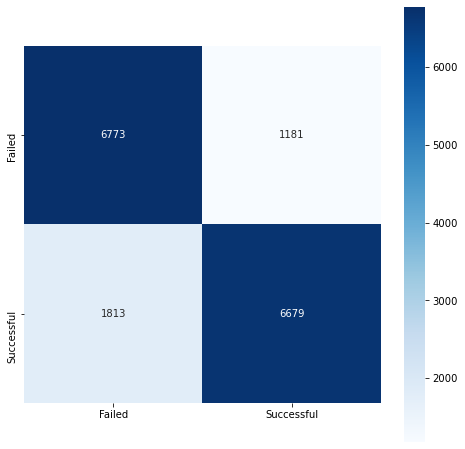

In [294]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_xticklabels(['Failed', 'Successful'])
ax.set_yticklabels(['Failed', 'Successful'])

In [295]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8179496534111638